### קריאת הקובץ סידור יצירת עמודות רלוונטיות

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


In [2]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = pd.to_datetime(df['date_occurred']).apply(categorize_time)



In [3]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
    try:
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60:
            return "old"
    except:
        return "unknown"


df["age_description"] = df["victim_age"].apply(age_category)


In [4]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'


df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)


In [5]:
## הוספת עמודה של פער בין דאריך הדיווח לתאריך ההתרחשות בימים
df['date_reported'] = pd.to_datetime(df['date_reported']).dt.date
df['date_occurred'] = pd.to_datetime(df['date_occurred']).dt.date
df['day_dift'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred'])).dt.days




In [6]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])
df['day_of_week'] = df['date_occurred'].dt.day_name()

In [7]:
def age_category(age):
    try:
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60 :
            return "old"
    except:
        return "unknown"


df["age_description"] = df["victim_age"].apply(age_category)


In [8]:
df.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude', 'day_time', 'age_description',
       'period_occurred', 'day_dift', 'day_of_week'],
      dtype='object')

### תרגום של העמודות

In [6]:
import pandas as pd


file_pt= r'C:\Users\Win10\Desktop\Columns_transltion.xlsx'


translating = pd.read_excel(file_pt)


last_three_columns = translating .iloc[:, -3:]


my_translation = last_three_columns.iloc[6:]

my_translation 

,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,משתנה,תיאור,סוג
7,division_number,מספר המחלקה של אירוע הפשע.,int
8,date_reported,התאריך שבו דווח הפשע.,datetime64[ns]
9,date_occurred,התאריך שבו התרחש הפשע.,datetime64[ns]
10,area,קוד האזור שבו התרחש אירוע הפשע.,int
11,area_name,שם האזור שבו התרחש אירוע הפשע.,object
12,reporting_district,אזור הדיווח של אירוע הפשע.,int
13,part,מספר החלק של אירוע הפשע.,int
14,crime_code,קוד המתאים לסוג הפשע.,int
15,crime_description,תיאור הפשע.,object


### קוד הפשע של כל פשע

In [16]:
crime_df = df[['crime_description', 'crime_code']]
crime_df = crime_df.drop_duplicates(subset=['crime_code'], keep='first')
crime_by_number = crime_df[crime_df["crime_code"] == 624]
crime_by_number 

,crime_description,crime_code
0,BATTERY - SIMPLE ASSAULT,624


### פיצול הקובץ לקטגוריות

In [43]:
violence_df = df[df['crime_description'].isin(['BATTERY - SIMPLE ASSAULT',
                                         'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                         'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                         'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                         'ARSON',
                                         'INTIMATE PARTNER - SIMPLE ASSAULT',
                                         'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                         'BRANDISH WEAPON',
                                         'OTHER ASSAULT',
                                         'SHOTS FIRED AT INHABITED DWELLING',
                                         'KIDNAPPING - GRAND ATTEMPT',
                                         'DISCHARGE FIREARMS/SHOTS FIRED',
                                         'KIDNAPPING',
                                         'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                         'CRIMINAL HOMICIDE',
                                         'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                         'BATTERY ON A FIREFIGHTER',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                         'CRUELTY TO ANIMALS',
                                         'LYNCHING - ATTEMPTED',
                                         'MANSLAUGHTER, NEGLIGENT',
                                         'LYNCHING'])]
crime_list1 = [
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
    'THEFT PLAIN - PETTY ($950 & UNDER)',
    'ROBBERY',
    'BURGLARY',
    'VEHICLE - STOLEN',
    'BUNCO, GRAND THEFT',
    'THEFT OF IDENTITY',
    'BIKE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'EXTORTION',
    'CHILD STEALING',
    'ATTEMPTED ROBBERY',
    'PURSE SNATCHING',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'BUNCO, PETTY THEFT',
    'BUNCO, ATTEMPT',
    'THEFT PLAIN - ATTEMPT',
    'SHOPLIFTING - ATTEMPT',
    'THEFT FROM PERSON - ATTEMPT',
    'VEHICLE - ATTEMPT STOLEN',
    'BURGLARY FROM VEHICLE, ATTEMPTED',
    'PICKPOCKET',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'TILL TAP - PETTY ($950 & UNDER)',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'PETTY THEFT - AUTO REPAIR',
    'BOAT - STOLEN',
    'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN',
    'BRIBERY',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    'GRAND THEFT / INSURANCE FRAUD',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'GRAND THEFT / AUTO REPAIR',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

Thefts_and_frauds = df[df['crime_description'].isin(crime_list1)]

crime_list2 = [
    'RAPE, FORCIBLE',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
    'BATTERY WITH SEXUAL CONTACT',
    'LETTERS, LEWD - TELEPHONE CALLS, LEWD',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'INDECENT EXPOSURE',
    'ORAL COPULATION',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'PIMPING',
    'RAPE, ATTEMPTED',
    'CHILD PORNOGRAPHY',
    'PEEPING TOM',
    'PANDERING',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'
]


sex_crimes = df[df['crime_description'].isin(crime_list2)]



### בדיקת תקינות הנתונים

In [ ]:
missing_values_by_column = df.isnull().sum()


result_df = pd.DataFrame({
    'column name': missing_values_by_column.index,
    'Amount of missing values': missing_values_by_column.values
})
missing_values_by_column 

In [ ]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [9]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [10]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [11]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


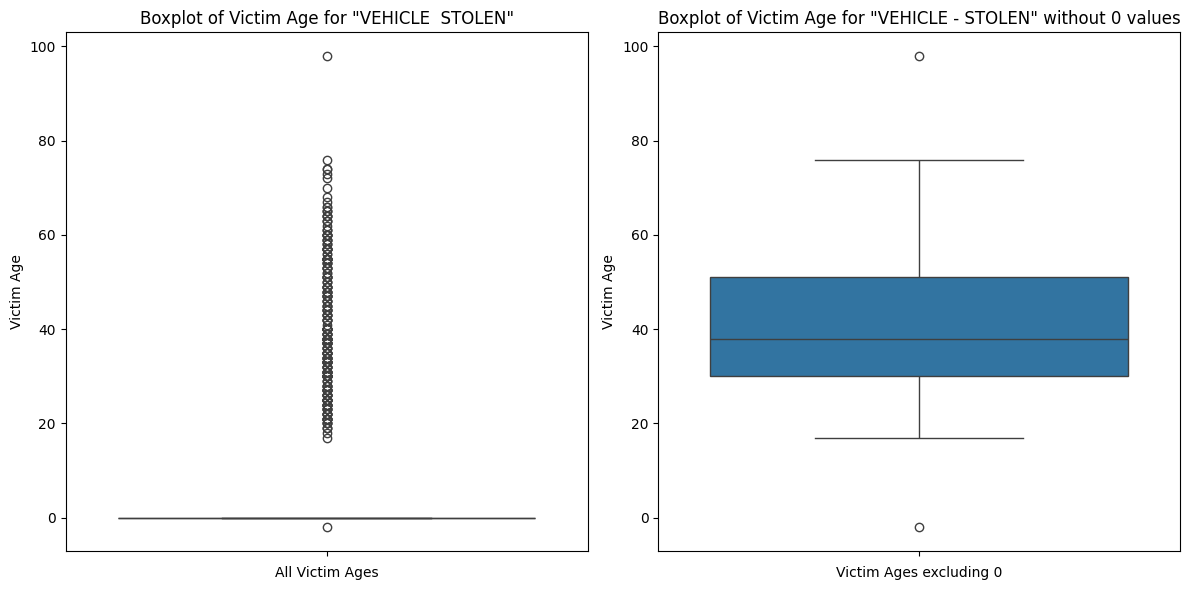

In [29]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [30]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

###  ריצחות והריגות

In [ ]:
violence_df
cod_crime = violence_df[['crime_description', 'crime_code']]
cod_crime = cod_crime.drop_duplicates(subset=['crime_code'], keep='first')

In [13]:
kiling_data = violence_df.loc[violence_df['crime_code'].isin([110, 111])]
kiling_data # דאטה על הרציחות 

victim_age_count = kiling_data['victim_age'].value_counts().reset_index()
victim_age_count.columns = ['Victim age','Number of murdered'] # דאטה רציחות לפי גיל

victim_sex_count = kiling_data['victim_sex'].value_counts().reset_index()
victim_sex_count.columns = ['Victim sex','Number of murdered'] #דאטה רציחות לפי מין 


area_count = kiling_data['area_name'].value_counts().reset_index()
area_count.columns = ['Area name','Number of murdered'] # דאטה רציחות לפי אזור

ethnicity_count = kiling_data['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Murder by ethnicity','Number of murdered'] # דאטה רציחות לפי מוצא אתני 

day_time_count = kiling_data['day_time'].value_counts().reset_index()
day_time_count.columns = ['Murders by time of day','Number of murdered'] # דאטה רציחות לפי זמן


C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')


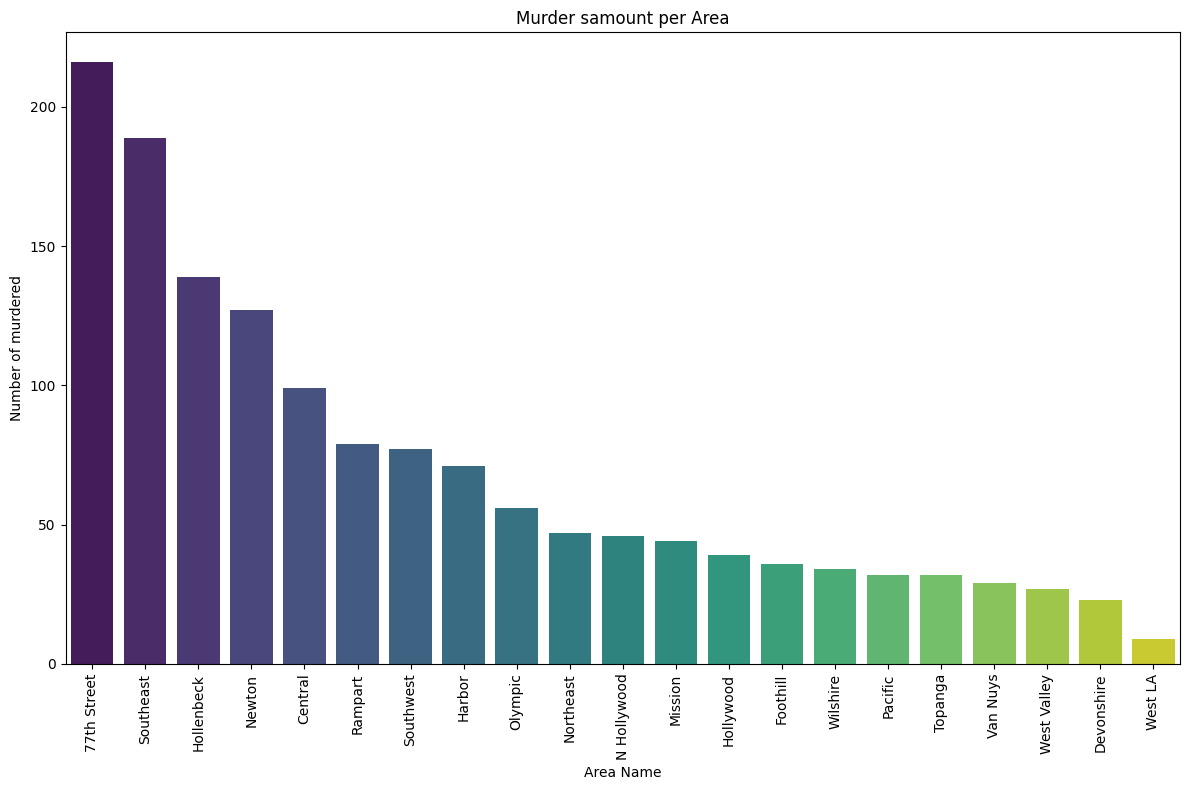

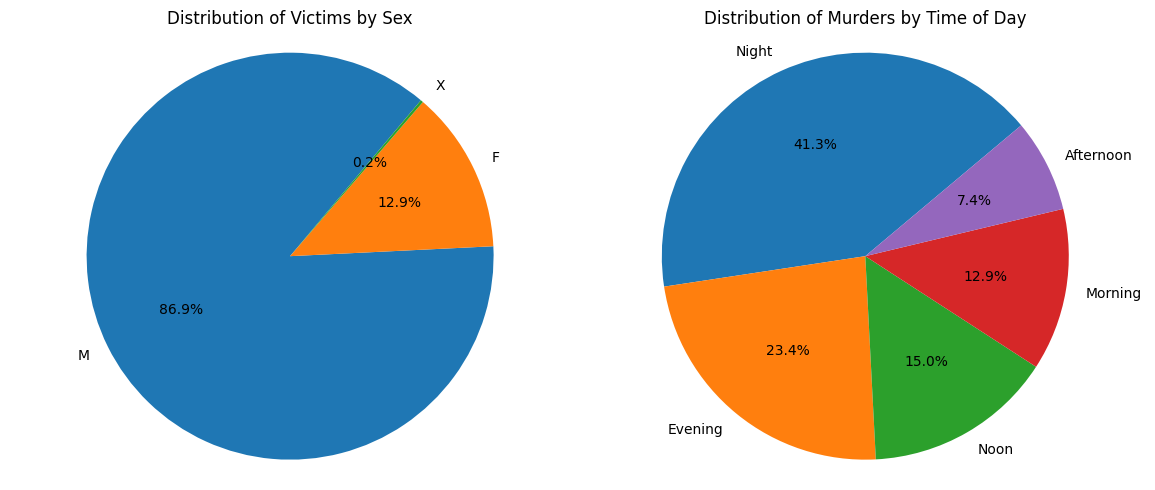

C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)


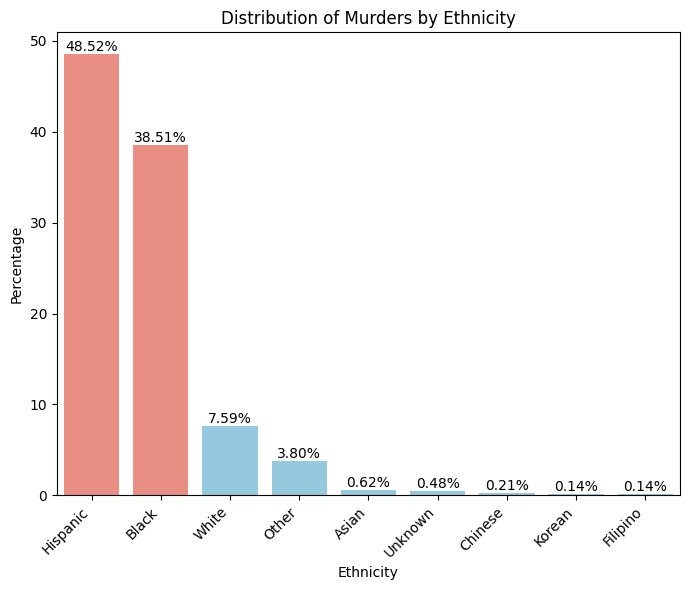

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')
plt.xlabel('Area Name')
plt.ylabel('Number of murdered')
plt.title('Murder samount per Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




victim_sex_count = kiling_data['victim_sex'].value_counts()
day_time_count = kiling_data['day_time'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(victim_sex_count, labels=victim_sex_count.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Victims by Sex')
plt.axis('equal')  

plt.subplot(1, 2, 2)
plt.pie(day_time_count, labels=day_time_count.index, autopct='%1.1f%%', startangle=40)
plt.title('Distribution of Murders by Time of Day')
plt.axis('equal')

plt.tight_layout()
plt.show()




total_murders = ethnicity_count['Number of murdered'].sum()


ethnicity_count['Percentage'] = (ethnicity_count['Number of murdered'] / total_murders) * 100


plt.figure(figsize=(7, 6))
colors = ['skyblue' if x <= ethnicity_count['Percentage'].mean() else 'salmon' for x in ethnicity_count['Percentage']]
plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)
plt.title('Distribution of Murders by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.show()



In [15]:
### מקומות בהם קראו מקרי רצח
pr = kiling_data['premise_description'].value_counts().reset_index()
pr.columns = ['premise description','Number of murdered']
pr.head(20)


,premise description,Number of murdered
0,STREET,533
1,SIDEWALK,259
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",148
3,PARKING LOT,107
4,SINGLE FAMILY DWELLING,107
5,ALLEY,54
6,PARK/PLAYGROUND,29
7,DRIVEWAY,26
8,"VEHICLE, PASSENGER/TRUCK",17
9,OTHER BUSINESS,11


In [35]:
### שימושיים בנשק בריצחות והריגות

In [21]:
use_of_weapons_data = kiling_data[kiling_data['weapon_description'].notna()]
frequency_of_use = use_of_weapons_data['weapon_description'].value_counts().reset_index()
frequency_of_use.columns = ['weapon_description','amount_of_uses']
frequency_of_use 

def sum_column_by_names(df, column_names):
    return frequency_of_use[frequency_of_use['weapon_description'].isin(column_names)]['amount_of_uses'].sum()

guns_sum = sum_column_by_names(frequency_of_use, ['HAND GUN', 'UNKNOWN FIREARM', 'SEMI-AUTOMATIC PISTOL', 'OTHER FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'STARTER PISTOL/REVOLVER', 'SEMI-AUTOMATIC RIFLE', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC'])

cold_weapon_sum = sum_column_by_names(frequency_of_use, ['UNKNOWN WEAPON/OTHER WEAPON', 'OTHER KNIFE', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'KNIFE WITH BLADE 6INCHES OR LESS', 'KITCHEN KNIFE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'FOLDING KNIFE', 'OTHER CUTTING INSTRUMENT', 'BLUNT INSTRUMENT', 'HAMMER', 'CLUB/BAT', 'SWITCH BLADE', 'SCISSORS', 'BOTTLE', 'SCREWDRIVER', 'MACHETE', 'AXE', 'DIRK/DAGGER'])

improvised_weapon_sum = sum_column_by_names(frequency_of_use, ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'PIPE/METAL PIPE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BOTTLE', 'BOARD', 'ANTIQUE FIREARM'])

ignition_or_run_over_sum = sum_column_by_names(frequency_of_use, ['VEHICLE', 'FIRE'])

something_else_sum = sum_column_by_names(frequency_of_use, ['VERBAL THREAT', 'SCALDING LIQUID', 'EXPLOXIVE DEVICE', 'LIQUOR/DRUGS'])

new_df = pd.DataFrame({'guns': [guns_sum],
                       'cold weapon': [cold_weapon_sum],
                       'An improvised weapon': [improvised_weapon_sum],
                       'ignition or run over': [ignition_or_run_over_sum],
                       'Something else': [something_else_sum]})

new_df

,guns,cold weapon,An improvised weapon,ignition or run over,Something else
0,1075,253,99,18,4


### עברות ביום לפי זמנים ביום

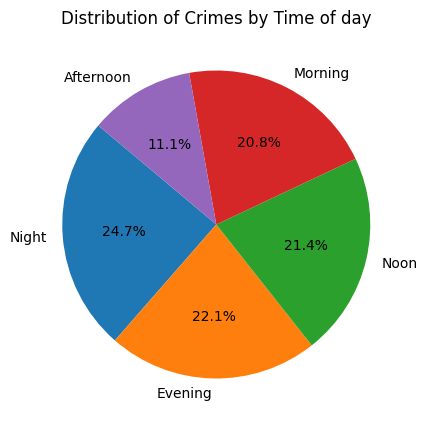

In [30]:
day_time_count = df['day_time'].value_counts().reset_index()
day_time_count.columns = ['crimes by time of day','Number of crimes']
day_time_count
plt.figure(figsize=(5,5))
plt.pie(day_time_count['Number of crimes'], labels=day_time_count['crimes by time of day'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Time of day')
plt.show()

#####   לא ניתן להסיק משהו משמעתותי על שעות הפעילות של הפושעים בשעות היום הכל מסודר באופן די שווה
להוציא את שעות אחר הצהריים כי בסהכ אחר הצהריים זהבין השעות 16:00 ל 18:00 ולגיטימי שיהיה להם פחות אחוזים

### קורבנות לפי מוצע אתני

In [41]:
ethnicity_count = df['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Crime by ethnicity','Number of crime']
ethnicity_count

,Crime by ethnicity,Number of crime
0,Hispanic,261145
1,White,173440
2,Black,120896
3,Unknown,83214
4,Other,67532
5,Asian,18700
6,Korean,4579
7,Filipino,3580
8,Chinese,3313
9,Japanese,1181


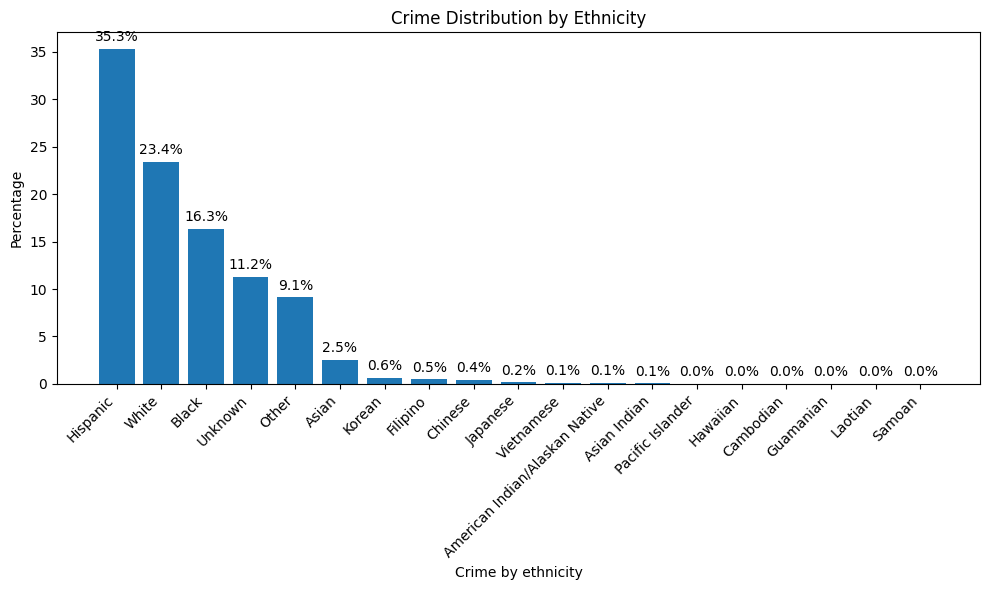

In [42]:

ethnicity_count = df['victim_descent'].value_counts(normalize=True).reset_index()
ethnicity_count.columns = ['Crime by ethnicity', 'Percentage']


ethnicity_count = ethnicity_count[ethnicity_count['Percentage'] != 0]


plt.figure(figsize=(10, 6))
plt.bar(ethnicity_count['Crime by ethnicity'], ethnicity_count['Percentage'] * 100)
plt.title('Crime Distribution by Ethnicity')
plt.xlabel('Crime by ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')


for i, percentage in enumerate(ethnicity_count['Percentage']):
    plt.text(i, percentage * 100 + 0.5, f'{percentage*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
crime_description_count_df = crime_description_count.to_frame().reset_index()
crime_description_count_df.columns = ['crime_description', 'count']
crime_description_count_df.head(20)

NameError: name 'crime_description_count' is not defined

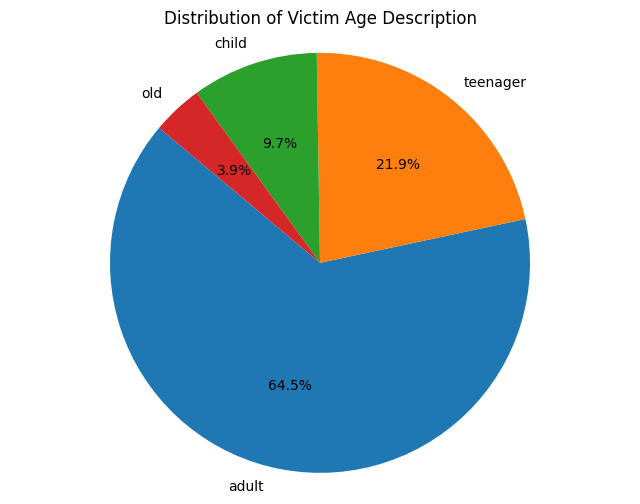

In [45]:
age_counts = sex_crimes["age_description"].value_counts()



plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Age Description')
plt.axis('equal') 
plt.show()

###  פשעים נגד ילדים ונערים

In [8]:
relevant_crimes = [
    'BATTERY - SIMPLE ASSAULT', 'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'INTIMATE PARTNER - SIMPLE ASSAULT', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'BATTERY WITH SEXUAL CONTACT',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'OTHER ASSAULT',
    'SEXUAL PENETRATION W/FOREIGN OBJECT', 'DISCHARGE FIREARMS/SHOTS FIRED', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'CHILD ANNOYING (17YRS & UNDER)',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'RAPE, ATTEMPTED', 'CRIMINAL HOMICIDE'
]

# סינון הדאטה לפי התנאים הרלוונטיים
filtered_df = df[
    (df['victim_age'] >= 1) & (df['victim_age'] <= 18) &
    (df['crime_description'].isin(relevant_crimes))
]

chaildren_df = filtered_df


## לצורך הבדיקה הורדנו ערכים קטנים מ1 כי אנו סבורים שגילאים בהם הוזמן הערך 0 הם כנראה ערכים חסרים וערכים שקטנים מ0 זה כנראה טעות והם לא בהכרח מעידים על ילדים





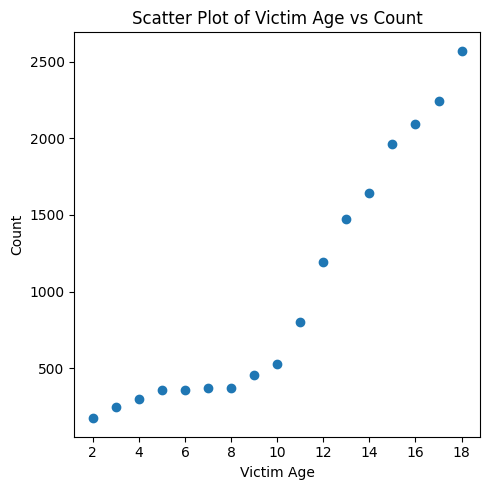

In [9]:
age_counts = chaildren_df['victim_age'].value_counts().reset_index()
age_counts.columns = ['victim_age', 'count']

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(age_counts['victim_age'], age_counts['count'])
ax.set_title('Scatter Plot of Victim Age vs Count')
ax.set_xlabel('Victim Age')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


###### ניקח רק ערכים שגדולים מ 0 כנראה במקום ערכים חסרים הזינו 0 וגבי -2.5 כנראה טעות הקלדה על מנת להסיק בצורה טובה יותר לא ניקח אותם בחשבון

In [33]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]

non_residential_non_schools = [
    'STREET', 'SIDEWALK', 'PARKING LOT', 'PARK/PLAYGROUND', 'OTHER BUSINESS', 'ALLEY',
    'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'VEHICLE, PASSENGER/TRUCK', 'MTA BUS',
    'SHOPPING MALL (COMMON AREA)', 'GAS STATION', 'BUS STOP', 'HOTEL', 'OTHER/OUTSIDE',
    'MARKET', 'MOTEL', 'LAUNDROMAT', 'THEATRE/MOVIE', 'MISSIONS/SHELTERS', 'BEACH',
    'GARAGE/CARPORT', 'DEPARTMENT STORE', 'OTHER STORE', 'HEALTH SPA/GYM',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)', 'TRANSPORTATION FACILITY (AIRPORT)',
    'MINI-MART', 'HOSPITAL', 'PARKING UNDERGROUND/BUILDING', 'BUS-CHARTER/PRIVATE',
    'LIQUOR STORE', 'COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET\'S, ETC.)', 'CAR WASH',
    'MEDICAL/DENTAL OFFICES', 'DRUG STORE', 'OFFICE BUILDING/OFFICE', 'FREEWAY', 'LIBRARY',
    'SWAP MEET', 'ELEVATOR', 'PATIO*', 'SKATEBOARD FACILITY/SKATEBOARD PARK*', 'STAIRWELL*',
    'CONVENTION CENTER', 'MTA - RED LINE - HOLLYWOOD/WESTERN', 'MTA - RED LINE - HOLLYWOOD/VINE',
    'POLICE FACILITY', 'MTA PROPERTY OR PARKING LOT', 'BAR/COCKTAIL/NIGHTCLUB',
    'MTA - RED LINE - UNION STATION', 'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY',
    'MTA - EXPO LINE - EXPO PARK/USC', 'NURSING/CONVALESCENT/RETIREMENT HOME',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'SPORTS VENUE, OTHER',
    'MTA - BLUE LINE - 7TH AND METRO CENTER', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)',
    'AUTO REPAIR SHOP', 'BEAUTY/BARBER SHOP', 'MTA - RED LINE - NORTH HOLLYWOOD',
    'JEWELRY STORE', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 'MTA - RED LINE - 7TH AND METRO CENTER',
    'BALCONY*', 'MTA - BLUE LINE - 103RD/WATTS TOWERS', 'MTA - EXPO LINE - EXPO/BUNDY',
    'MTA - RED LINE - VERMONT/SANTA MONICA', 'CLOTHING STORE', 'CATERING/ICE CREAM TRUCK',
    'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - ORANGE LINE - RESEDA',
    'LA UNION STATION (NOT LINE SPECIFIC)', 'DETENTION/JAIL FACILITY',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT', 'MTA - BLUE LINE - GRAND/LATTC',
    'DRIVEWAY', 'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'SLIPS/DOCK/MARINA/BOAT'
]

# פונקציה שמחזירה את הקטגוריה המתאימה
def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    elif premise in non_residential_non_schools:
        return 'Non-Residential and Non-Schools'
    else:
        return 'Unknown'


chaildren_df['where_did_it_happen'] = chaildren_df['premise_description'].apply(categorize_premise)
### בנינו פונקציה שבודקת האם המקרה קרה מתחם מגורים למשל סוגרי דירות למינהם 

C:\Users\Win10\AppData\Local\Temp\ipykernel_11236\1437849870.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chaildren_df['where_did_it_happen'] = chaildren_df['premise_description'].apply(categorize_premise)


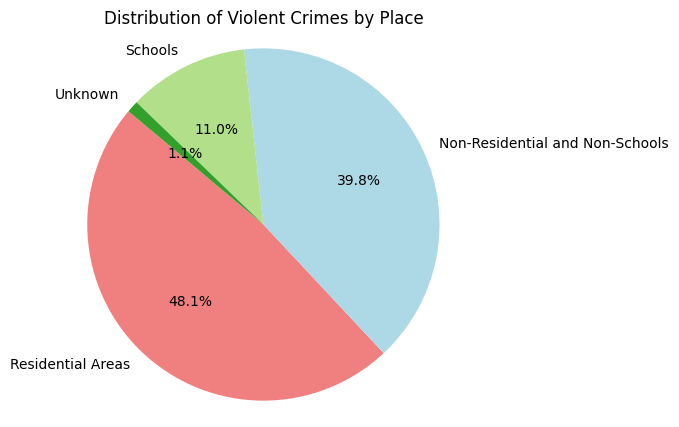

,place,amount
0,Residential Areas,8238
1,Non-Residential and Non-Schools,6817
2,Schools,1892
3,Unknown,187
4,Total,17134


In [40]:
wdih_child = chaildren_df['where_did_it_happen'].value_counts().reset_index()
wdih_child .columns = ['place', "amount"]



colors = ['lightcoral', 'lightblue'] + list(plt.cm.Paired(range(2, len(wdih_child))))
plt.figure(figsize=(5,5))
plt.pie(wdih_child['amount'], labels=wdih_child['place'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Violent Crimes by Place')
plt.axis('equal') 
plt.show()

total_amount = wdih_child['amount'].sum()
total_row = pd.DataFrame({'place': ['Total'], 'amount': [total_amount]})
wdih_child = pd.concat([wdih_child, total_row], ignore_index=True)
wdih_child

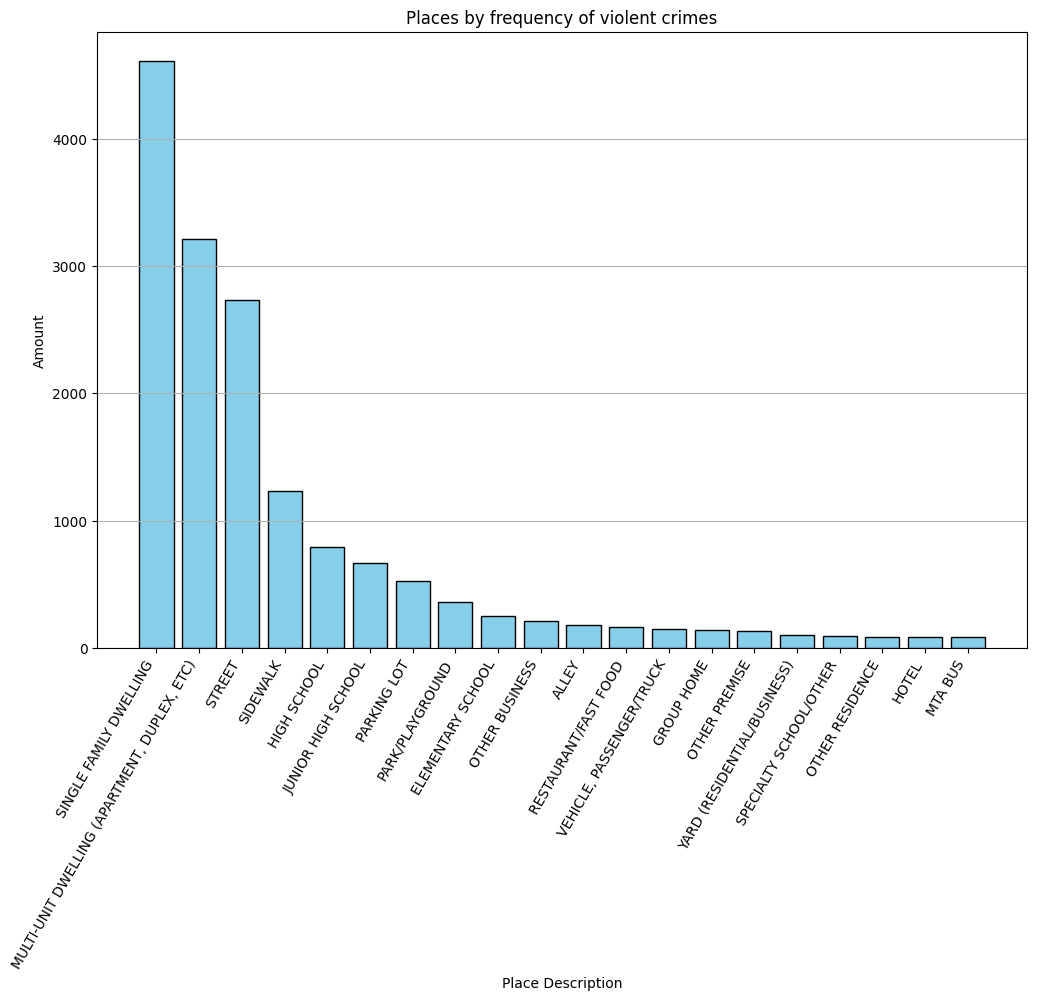

In [31]:
### מקומות נפוצים בהם קרו פשעי אלימות נגד קטינים וילדים
premise_counts_violence = chaildren_df['premise_description'].value_counts().reset_index()
premise_counts_violence.columns = ["place_description", "amount"]
premise_counts_violence.head(20)




plt.figure(figsize=(12, 8))
plt.bar(premise_counts_violence['place_description'].head(20), premise_counts_violence['amount'].head(20), color='skyblue', edgecolor='black')
plt.title('Places by frequency of violent crimes')
plt.xlabel('Place Description')
plt.ylabel('Amount')
plt.xticks(rotation=60,ha = "right")  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


##### מסקנה 1 
על פי ההתבוננות בהיסטוגרמה ניתן להבחין כי בפער בין המקומות בהם בוצעו פשעי אלימות נגד ילדים ונערים כאשר שני הקומות המובילים הינם מתחמי מגורים.
נתון זה עלול להצביע על מגמה מדאיגה של מקרים רבים שלאלימות במשפחה בשל הפער הגדול בין המקרים שקראו במתחמי מגורים לבין מקרים שקראו במקומות אחרים
מתוך 17134 מקרים של אלימות נגד ילדים ונכערים מתחת לגיל 18 בין השנים 2020 ל2023 8238 מקרים קראו במתחמי מגורים מעל 7.5 מקרים ליום בממוצע

### פשעים לפי עונות השנה

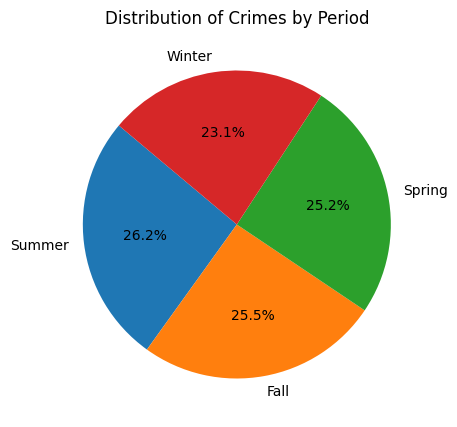

,priod,amount_crime
0,Summer,223392
1,Fall,217565
2,Spring,214844
3,Winter,197149


In [26]:
### נצייג שכאן לא נוריד שום פשע מכיוון שאנו רוצים לדעת על כלל הפשעים
priod_df = df["period_occurred"].value_counts().reset_index()
priod_df.columns = ["priod","amount_crime"]

plt.figure(figsize=(5,5))
plt.pie(priod_df['amount_crime'], labels=priod_df['priod'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Period')
plt.show()
priod_df


### טבלת עבירות נגד כל מוצא אתני

In [38]:
most_common_crime_description = df.groupby('victim_descent')['crime_description'].agg(lambda x: x.value_counts().idxmax())
most_common_crime_description.to_frame()

,crime_description
victim_descent,
American Indian/Alaskan Native,THEFT OF IDENTITY
Asian,BURGLARY
Asian Indian,BURGLARY FROM VEHICLE
Black,BATTERY - SIMPLE ASSAULT
Cambodian,BURGLARY FROM VEHICLE
Chinese,BURGLARY FROM VEHICLE
Filipino,BURGLARY FROM VEHICLE
Guamanian,BURGLARY FROM VEHICLE
Hawaiian,ARSON


### פשעים נגד היספנים

In [62]:
violence_victim = violence_df['victim_descent'].value_counts().reset_index()
violence_victim.columns = ['victim_descen', 'amount']
violence_victim

,victim_descen,amount
0,Hispanic,126178
1,Black,58663
2,White,49097
3,Other,20815
4,Unknown,20682
5,Asian,5511
6,Korean,795
7,Filipino,508
8,Chinese,374
9,Japanese,144


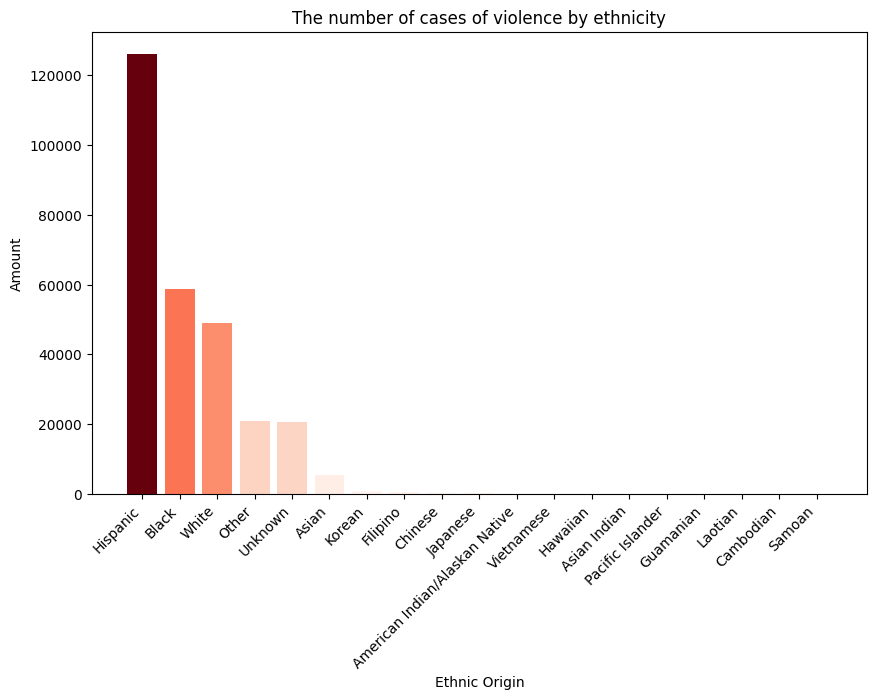

In [56]:
violence_victim = violence_df['victim_descent'].value_counts().reset_index()
violence_victim.columns = ['victim_descent', 'amount']

plt.figure(figsize=(10,6))


colors = ['red' for _ in range(len(violence_victim))]


normalized_amount = violence_victim['amount'] / float(max(violence_victim['amount']))
colors = plt.cm.Reds(normalized_amount)

plt.bar(violence_victim['victim_descent'], violence_victim['amount'], color=colors)  
plt.ylabel('Amount')
plt.xlabel('Ethnic Origin')
plt.title('The number of cases of violence by ethnicity')
plt.xticks(rotation=45,ha = "right")  
plt.show()

###### ניצן להבחין שכמות מקרי האלימות כלפי ההיספנקים גדולה ביותר מפי 2 מהלאום השני הבא אחריו
##### דבר זה יכול לרמז על אלימות כלפי ההיספנקים כפשעי אלימות על רקע לאומני נמשיך לבדוק על פשעים כלפיהם

In [65]:
victim_sex_crimes = sex_crimes['victim_descent'].value_counts().reset_index()
victim_sex_crimes.columns = ['victim_descent', 'amount']
victim_sex_crimes

,victim_descent,amount
0,Hispanic,6002
1,White,3087
2,Black,2407
3,Other,796
4,Unknown,790
5,Asian,358
6,Korean,14
7,Filipino,11
8,American Indian/Alaskan Native,9
9,Chinese,6


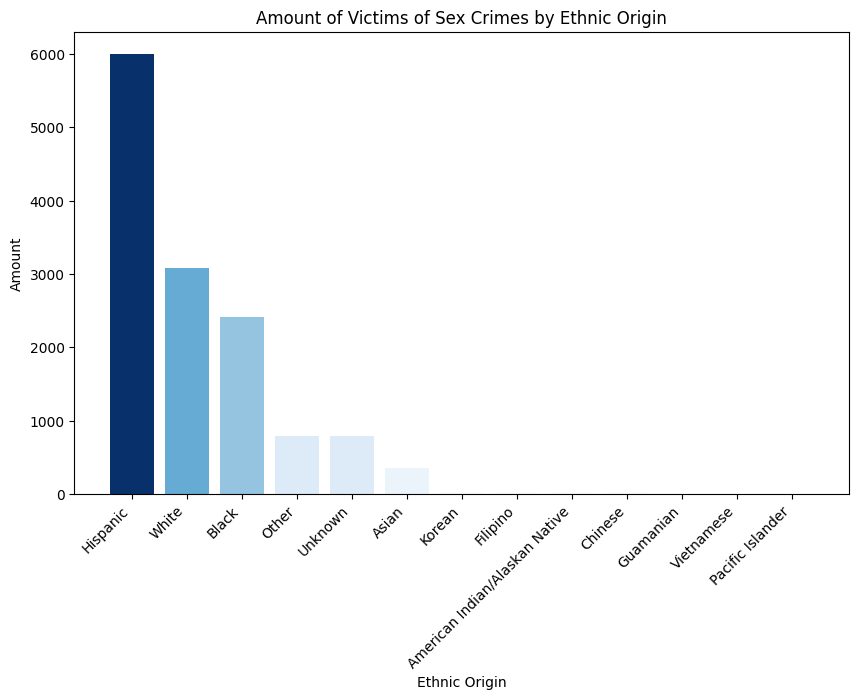

In [66]:
victim_sex_crimes = sex_crimes['victim_descent'].value_counts().reset_index()
victim_sex_crimes.columns = ['victim_descent', 'amount']

plt.figure(figsize=(10,6))

# Using only blue color for the bars
colors = ['blue' for _ in range(len(victim_sex_crimes))]

# Making the taller bars darker
normalized_amount = victim_sex_crimes['amount'] / float(max(victim_sex_crimes['amount']))
colors = plt.cm.Blues(normalized_amount)

plt.bar(victim_sex_crimes['victim_descent'], victim_sex_crimes['amount'], color=colors)  # Vertical bar plot
plt.ylabel('Amount')
plt.xlabel('Ethnic Origin')
plt.title('Amount of Victims of Sex Crimes by Ethnic Origin')
plt.xticks(rotation=45,ha = "right")  # Rotate x-axis labels for better readability
plt.show()

##### מגמת הפשיעה נגד ההספניקים נמשכת
הנתונים על פשעי אלימות ומין נגד ההיספנקים מציגים לנו נתונים מדאיגים נמשיך לחקור את הנושא

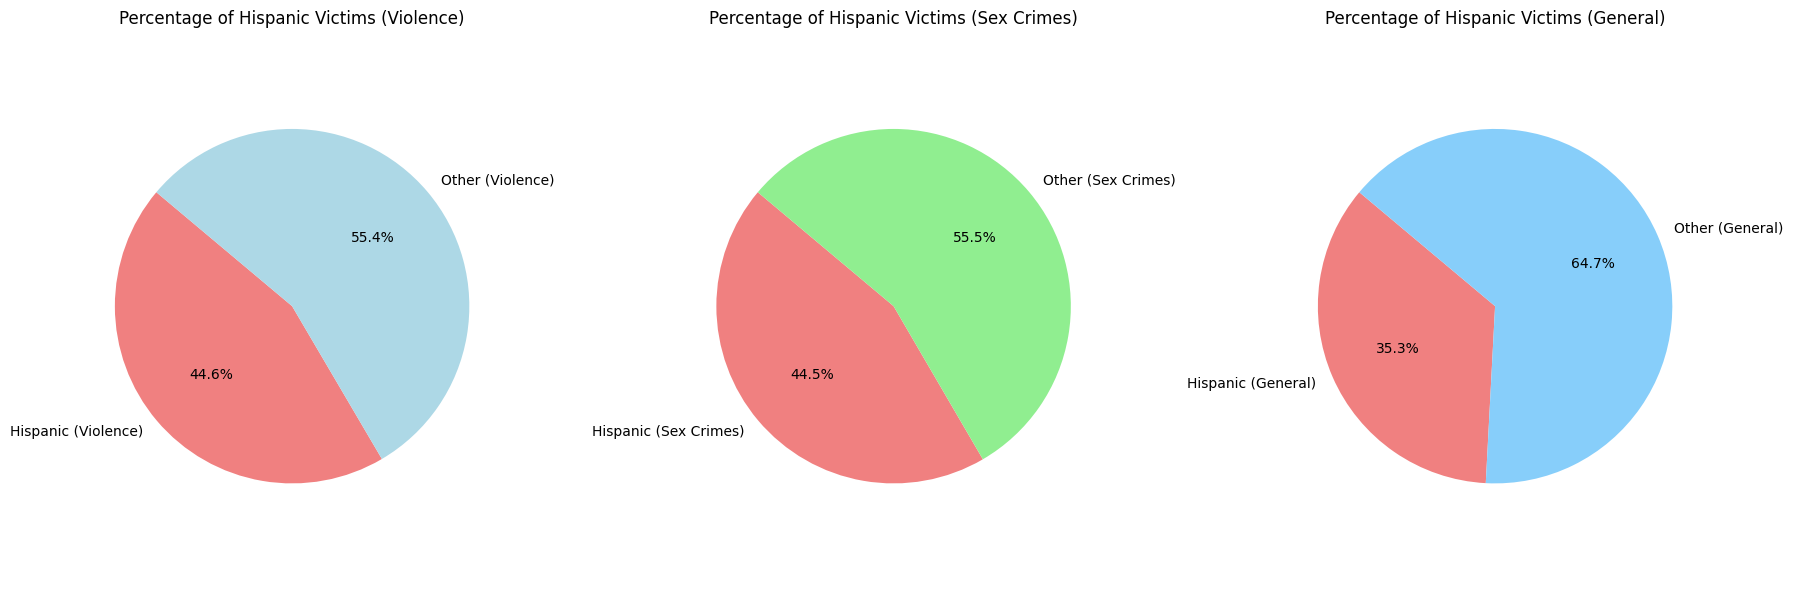

In [79]:
# For violence_df
victim_descent_data_violence = violence_df['victim_descent'].value_counts()
hispanic_count_violence = victim_descent_data_violence.get('Hispanic', 0)
other_count_violence = victim_descent_data_violence.sum() - hispanic_count_violence

# For sex_crimes
victim_descent_data_sex_crimes = sex_crimes['victim_descent'].value_counts()
hispanic_count_sex_crimes = victim_descent_data_sex_crimes.get('Hispanic', 0)
other_count_sex_crimes = victim_descent_data_sex_crimes.sum() - hispanic_count_sex_crimes

# For general victim descent data
victim_descent_data = df['victim_descent'].value_counts()
hispanic_count = victim_descent_data.get('Hispanic', 0)
other_count = victim_descent_data.sum() - hispanic_count

# Labels and sizes for violence_df
labels_violence = ['Hispanic (Violence)', 'Other (Violence)']
sizes_violence = [hispanic_count_violence, other_count_violence]
colors_violence = ['lightcoral', 'lightblue']  # Red for Hispanic, lightblue for others

# Labels and sizes for sex_crimes
labels_sex_crimes = ['Hispanic (Sex Crimes)', 'Other (Sex Crimes)']
sizes_sex_crimes = [hispanic_count_sex_crimes, other_count_sex_crimes]
colors_sex_crimes = ['lightcoral', 'lightgreen']  # Red for Hispanic, lightgreen for others

# Labels and sizes for general victim descent data
labels_general = ['Hispanic (General)', 'Other (General)']
sizes_general = [hispanic_count, other_count]
colors_general = ['lightcoral', 'lightskyblue']  # Red for Hispanic, lightgrey for others

# Plotting the combined pie charts
plt.figure(figsize=(18, 6))

# Subplot for violence_df
plt.subplot(1, 3, 1)
plt.pie(sizes_violence, labels=labels_violence, colors=colors_violence, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (Violence)')
plt.axis('equal')  # Ensure the pie chart is a circle

# Subplot for sex_crimes
plt.subplot(1, 3, 2)
plt.pie(sizes_sex_crimes, labels=labels_sex_crimes, colors=colors_sex_crimes, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (Sex Crimes)')
plt.axis('equal')  # Ensure the pie chart is a circle

# Subplot for general victim descent data
plt.subplot(1, 3, 3)
plt.pie(sizes_general, labels=labels_general, colors=colors_general, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (General)')
plt.axis('equal')  # Ensure the pie chart is a circle

plt.tight_layout()
plt.show()



In [ ]:
### הפשעים כנגד ההיספניקים מהווים כ44.6 מפשעי האלימות כ44.5 מפשעי המין וכ35.3 מתוך כלל הפשעים

In [82]:
hispanic_df = df[df["victim_descent"] =="Hispanic"]
area_counts = hispanic_df['area_name'].value_counts()
area_counts_df = pd.DataFrame(area_counts)
area_counts_df.reset_index(inplace=True)
area_counts_df.columns = ['area_name', 'amount']
area_counts_df


,area_name,amount
0,Newton,20552
1,Mission,18272
2,77th Street,17706
3,Hollenbeck,17021
4,Southeast,16079
5,Rampart,15834
6,Central,15634
7,Olympic,14061
8,Foothill,13347
9,Southwest,13238


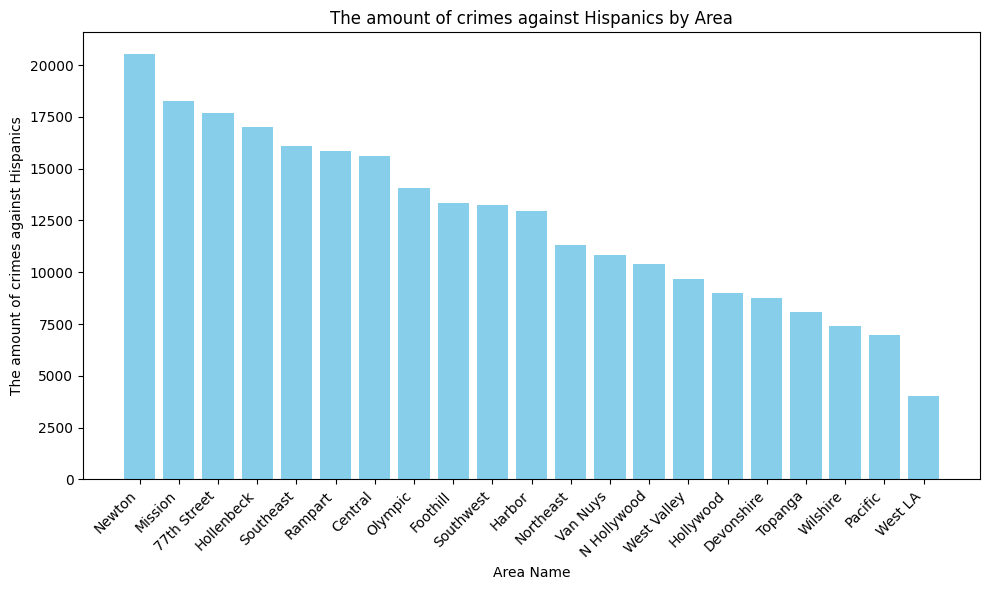

In [85]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(area_counts_df['area_name'], area_counts_df['amount'], color='skyblue')
plt.xlabel('Area Name')
plt.ylabel('The amount of crimes against Hispanics')
plt.title('The amount of crimes against Hispanics by Area')
plt.xticks(rotation=45,ha="right")
plt.tight_layout()  
plt.show()

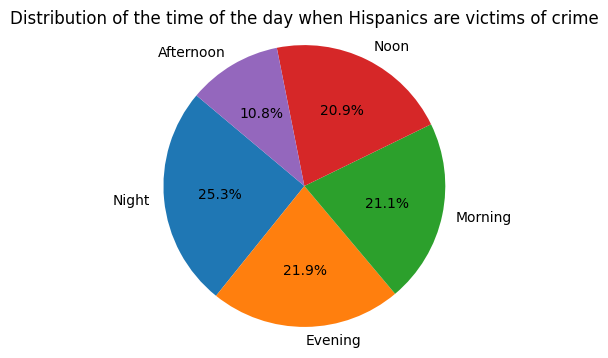

In [89]:
day_time_counts = hispanic_df['day_time'].value_counts()

# יצירת גרף עוגה
plt.figure(figsize=(4,4))
plt.pie(day_time_counts, labels=day_time_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the time of the day when Hispanics are victims of crime')
plt.axis('equal')
plt.show()

###### מסקנה 2 
אנו ממליצים למשרת לוס אנגל'ס לתגבר כוחות במקומות בהם נמצאים נפגעים הכי הרבה היספנים כי ההיספנים מהווים יותר מ35 אחוז
מכלל הנפגעים מפשע בלוס אנג'לס בין השנים2020 ל2023 וכיותר מ44 אחוז מפשעי המין והאלימות שקראו בלוס אנגלס באותם שנים
נעשו נגד היספנים מדובר על יותר מ297,500 מקרים בשלוש שנים ועל יותר מ270 מקרי פשיעה בממוצע ליום! מספרים שלא נתפסים


### חיפוש קורלציות

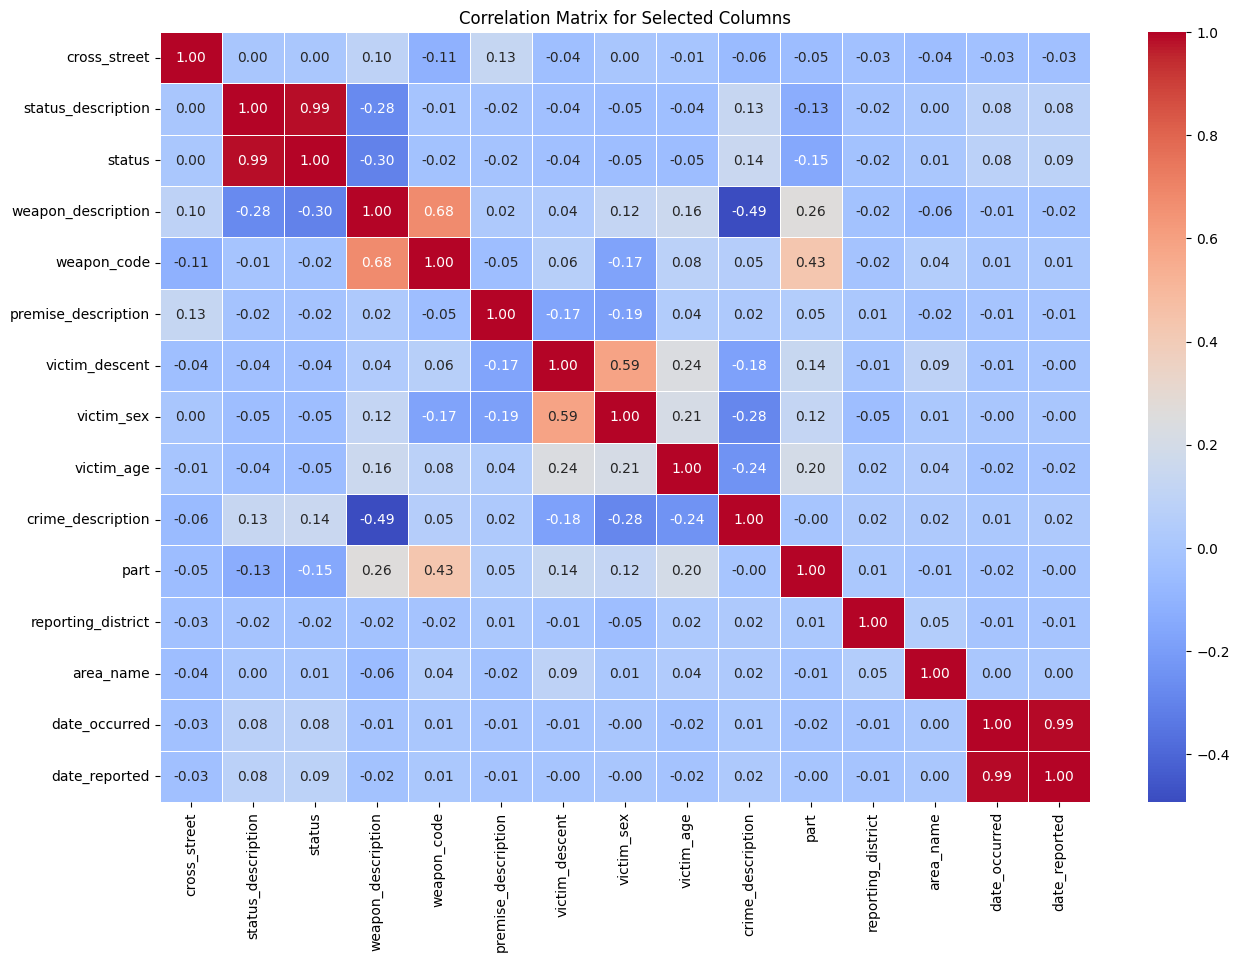

In [50]:
# Selecting specific columns for correlation analysis
selected_columns = [
    'cross_street', 'status_description', 'status', 'weapon_description',
    'weapon_code', 'premise_description', 'victim_descent', 'victim_sex',
    'victim_age', 'crime_description', 'part', 'reporting_district', 
    'area_name', 'date_occurred', 'date_reported'
]

# Create a copy of the dataframe with only the selected columns
df_selected = df[selected_columns].copy()

# Convert all non-numeric columns to categorical types and then to numerical codes for correlation analysis
non_numeric_columns_selected = df_selected.select_dtypes(exclude=['number']).columns

# Converting non-numeric columns to categorical codes
for column in non_numeric_columns_selected:
    df_selected[column] = df_selected[column].astype('category').cat.codes

# Calculate the correlation matrix for the selected columns
correlation_matrix_selected = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

### היסטוגרמה של התפלגות הגילאים

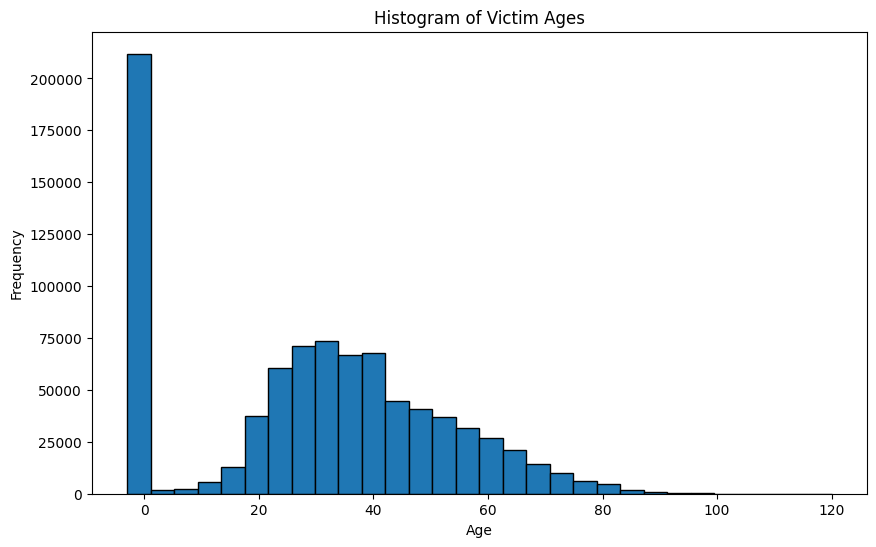

In [6]:
plt.figure(figsize=(10, 6))
df['victim_age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### פשעים לפי איזורים

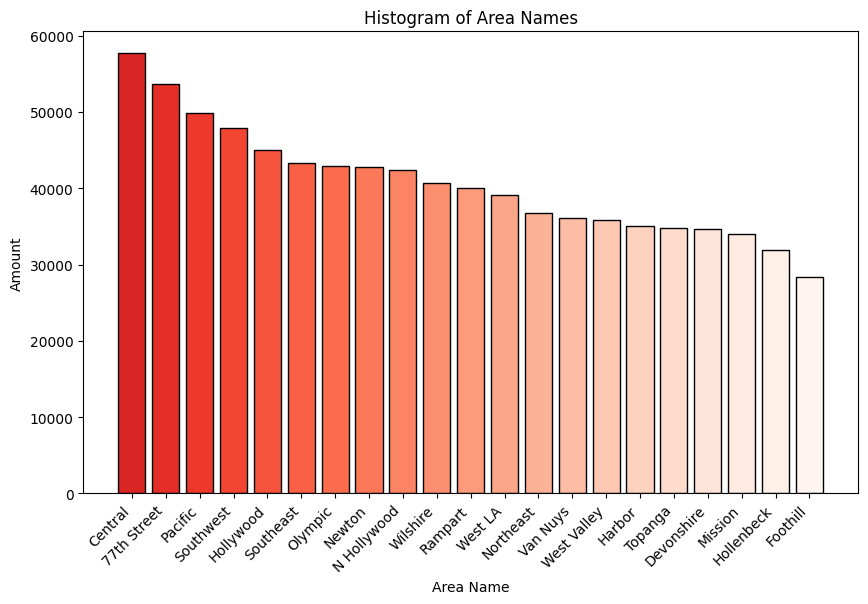

,area_name,amount
0,Central,57691
1,77th Street,53631
2,Pacific,49850
3,Southwest,47858
4,Hollywood,45018
5,Southeast,43357
6,Olympic,42979
7,Newton,42743
8,N Hollywood,42455
9,Wilshire,40648


In [8]:
area_df =  df['area_name'].value_counts().reset_index()
area_df.columns = ['area_name', 'amount']

plt.figure(figsize=(10, 6))
plt.bar(area_df['area_name'], area_df['amount'], color=plt.cm.Reds_r(np.linspace(0.3, 1, len(area_df))), edgecolor='black')
plt.title('Histogram of Area Names')
plt.xlabel('Area Name')
plt.ylabel('Amount')
plt.xticks(rotation=45,ha="right")
plt.show()
area_df

### רעיונות

מגמות פשיעה לאורך הזמן: ניתוח איך שיעורי הפשיעה השתנו בחודשים ובשנים.
התפלגות גיאוגרפית של פשעים: זיהוי אילו אזורים או שכונות יש את שיעורי הפשיעה הגבוהים ביותר.
סוגי פשעים נפוצים: קביעת סוגי הפשעים הנפוצים ביותר המדווחים.
סטטוס פתרון פשעים: חקירת הסטטוס של הפשעים המדווחים (לדוגמה, פשעים שנפתרו, בפעולה).
דפוסי פעילות פשיעה: ניתוח דפוסים או שיטות נפוצות בפשעים.
לבדוק גניבות של רכבים ואופנועים בב N הוליווד

#### פשעים נגד נשים וגברים 

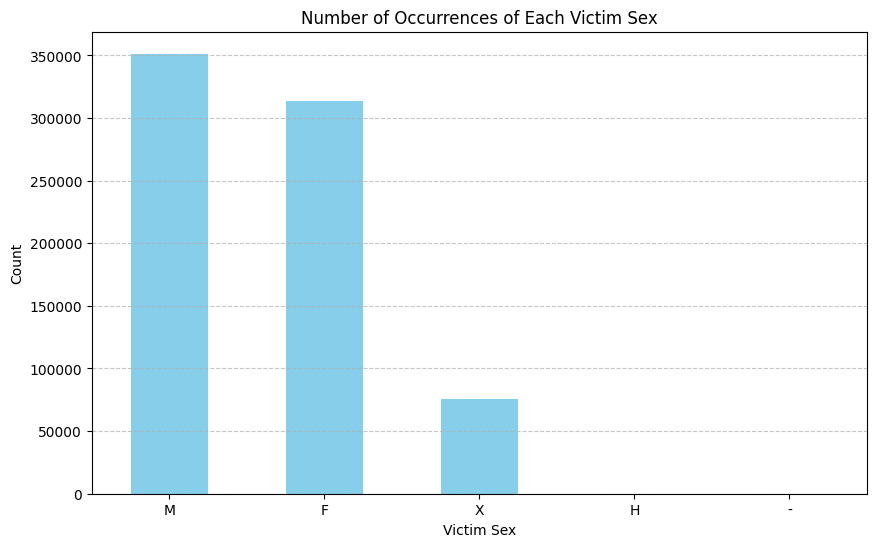

In [23]:
victim_sex_counts = df['victim_sex'].value_counts()

plt.figure(figsize=(10, 6))
victim_sex_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of Each Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
women_df = df[df["victim_sex"] =="F"]
men_df = df[df["victim_sex"] =="M"]

men_crime_description = men_df['crime_description'].value_counts().reset_index()
men_crime_description.columns = ['crime_description', 'amount']
men_crime_description.head(20)

,crime_description,amount
0,BATTERY - SIMPLE ASSAULT,35607
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34901
2,BURGLARY FROM VEHICLE,29484
3,BURGLARY,25742
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23908
5,THEFT OF IDENTITY,21695
6,THEFT PLAIN - PETTY ($950 & UNDER),20222
7,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,18228
8,ROBBERY,17340
9,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",13683


In [31]:
women_crime_description = women_df['crime_description'].value_counts().reset_index()
women_crime_description.columns = ['crime_description', 'amount']
women_crime_description

women_crime_description.head(20)

,crime_description,amount
0,INTIMATE PARTNER - SIMPLE ASSAULT,32408
1,BATTERY - SIMPLE ASSAULT,31946
2,THEFT OF IDENTITY,31030
3,BURGLARY FROM VEHICLE,21881
4,THEFT PLAIN - PETTY ($950 & UNDER),18661
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",17961
6,BURGLARY,14264
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13065
8,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,11319
9,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",10191


In [40]:
intimate_partner_df = women_df[women_df['crime_description'].str.contains('INTIMATE PARTNER', case=False, na=False)]
area_name_counts = intimate_partner_df['area_name'].value_counts().reset_index()
area_name_counts.columns = ['area_name', 'amount']
area_name_counts

,area_name,amount
0,77th Street,4153
1,Southeast,3388
2,Southwest,2735
3,Newton,2487
4,Mission,2278
5,Rampart,2246
6,Olympic,2234
7,Harbor,2199
8,Central,1975
9,N Hollywood,1839


### רעיונות למסקנות

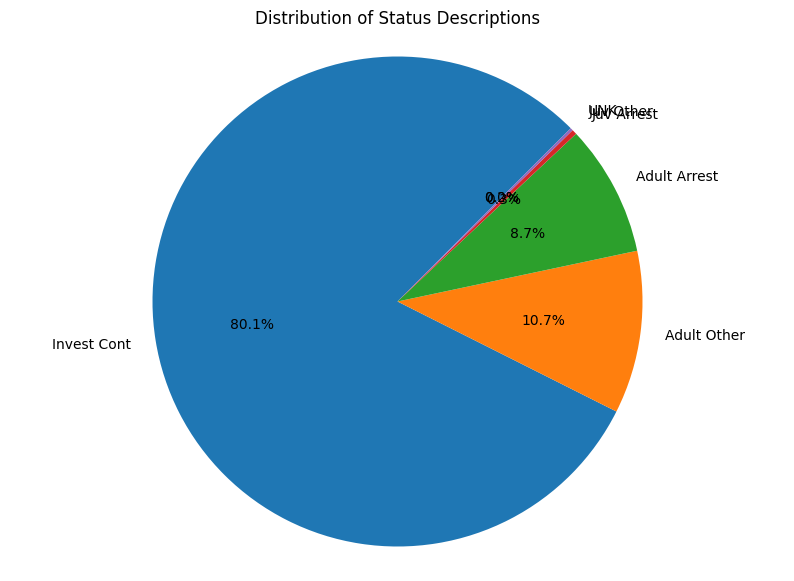

In [40]:
status_counts = df['status_description'].value_counts().reset_index()
status_counts.columns = ['status_description', 'count']

status_counts
plt.figure(figsize=(10, 7))
plt.pie(status_counts['count'], labels=status_counts['status_description'], autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Status Descriptions')
plt.axis('equal')  # שומרים על היחס כדי שהעוגה תהיה עגולה
plt.show()

In [42]:
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')

# מחיקת שורות שבהן לא הצלחנו להמיר את התאריך
crime_data = df.dropna(subset=['date_reported'])

# חילוץ השנה מהעמודה 'date_reported'
crime_data['year_reported'] = crime_data['date_reported'].dt.year

# קיבוץ לפי 'year_reported' ו-'status_description' וספירת הכמות בכל קבוצה
status_counts_by_year = crime_data.groupby(['year_reported', 'status_description']).size().reset_index(name='count')
status_counts_by_year 

,year_reported,status_description,count
0,2020,Adult Arrest,20239
1,2020,Adult Other,25488
2,2020,Invest Cont,145953
3,2020,Juv Arrest,734
4,2020,Juv Other,289
5,2021,Adult Arrest,19566
6,2021,Adult Other,25261
7,2021,Invest Cont,162503
8,2021,Juv Arrest,621
9,2021,Juv Other,332


In [43]:
crime_data['date_reported'] = pd.to_datetime(crime_data['date_reported'], errors='coerce')

# מחיקת שורות שבהן לא הצלחנו להמיר את התאריך
crime_data = crime_data.dropna(subset=['date_reported'])

# חילוץ השנה מהעמודה 'date_reported'
crime_data['year_reported'] = crime_data['date_reported'].dt.year

# קיבוץ לפי 'year_reported' ו-'status_description' וספירת הכמות בכל קבוצה
status_counts_by_year = crime_data.groupby(['year_reported', 'status_description']).size().unstack(fill_value=0)

# חישוב האחוזים לכל ערך של status_description בכל שנה
status_percentages_by_year = status_counts_by_year.div(status_counts_by_year.sum(axis=1), axis=0) * 100

# הצגת התוצאה
print(status_percentages_by_year)

status_description  Adult Arrest  Adult Other  Invest Cont  Juv Arrest  \
year_reported                                                            
2020                   10.502691    13.226571    75.739869    0.380897   
2021                    9.393950    12.128210    78.020290    0.298152   
2022                    8.246620    10.467273    80.799010    0.304170   
2023                    6.829938     7.479092    85.164455    0.325038   

status_description  Juv Other       UNK  
year_reported                            
2020                 0.149972  0.000000  
2021                 0.159399  0.000000  
2022                 0.182077  0.000851  
2023                 0.200555  0.000922  


### למה אנשים לא מדווחים בזמן

In [73]:
age_description_avg_day_diff = df.groupby('age_description')['day_dift'].mean().reset_index()


age_description_avg_day_diff.columns = ['age_description', 'average_day_dift']
age_description_avg_day_diff

,age_description,average_day_dift
0,adult,10.710647
1,child,51.946069
2,old,8.566717
3,teenager,34.294754


C:\Users\Win10\AppData\Local\Temp\ipykernel_2860\1500308391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teenager_df['z_score'] = np.abs((teenager_df['day_dift'] - teenager_df['day_dift'].mean()) / teenager_df['day_dift'].std())


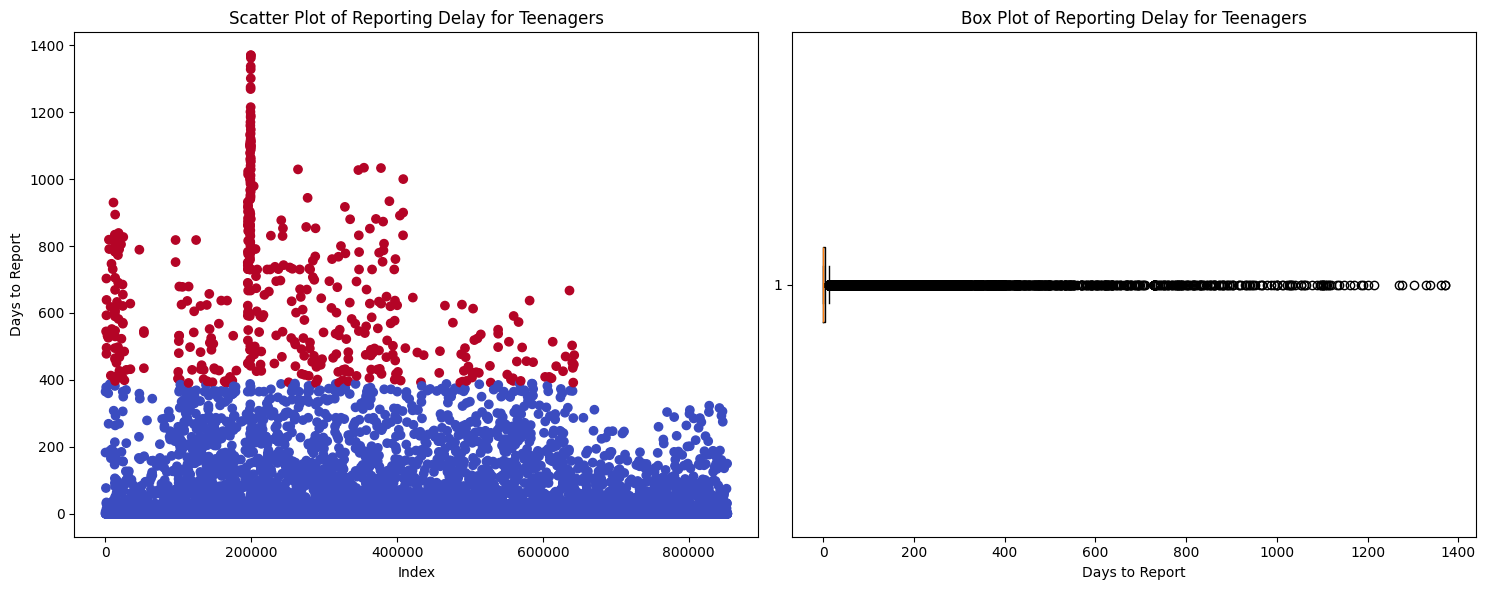

In [42]:
eenager_df = df[df['age_description'] == 'teenager']

# Identifying outliers using z-score
teenager_df['z_score'] = np.abs((teenager_df['day_dift'] - teenager_df['day_dift'].mean()) / teenager_df['day_dift'].std())

# Creating the scatter plot and box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with outliers marked
ax[0].scatter(teenager_df.index, teenager_df["day_dift"], c=teenager_df['z_score'] > 3, cmap='coolwarm')
ax[0].set_title('Scatter Plot of Reporting Delay for Teenagers')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Days to Report')

# Box plot
ax[1].boxplot(teenager_df['day_dift'], vert=False)
ax[1].set_title('Box Plot of Reporting Delay for Teenagers')
ax[1].set_xlabel('Days to Report')

plt.tight_layout()
plt.show()

In [8]:
### נבדוק את כל הערכים שנמצאיפ מעל הממוצע וננסה להבין מדוע לוקח לבני הנוער יחסית הרבה זמן להתלון על פשעים נגדם

C:\Users\Win10\AppData\Local\Temp\ipykernel_11696\1569292334.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


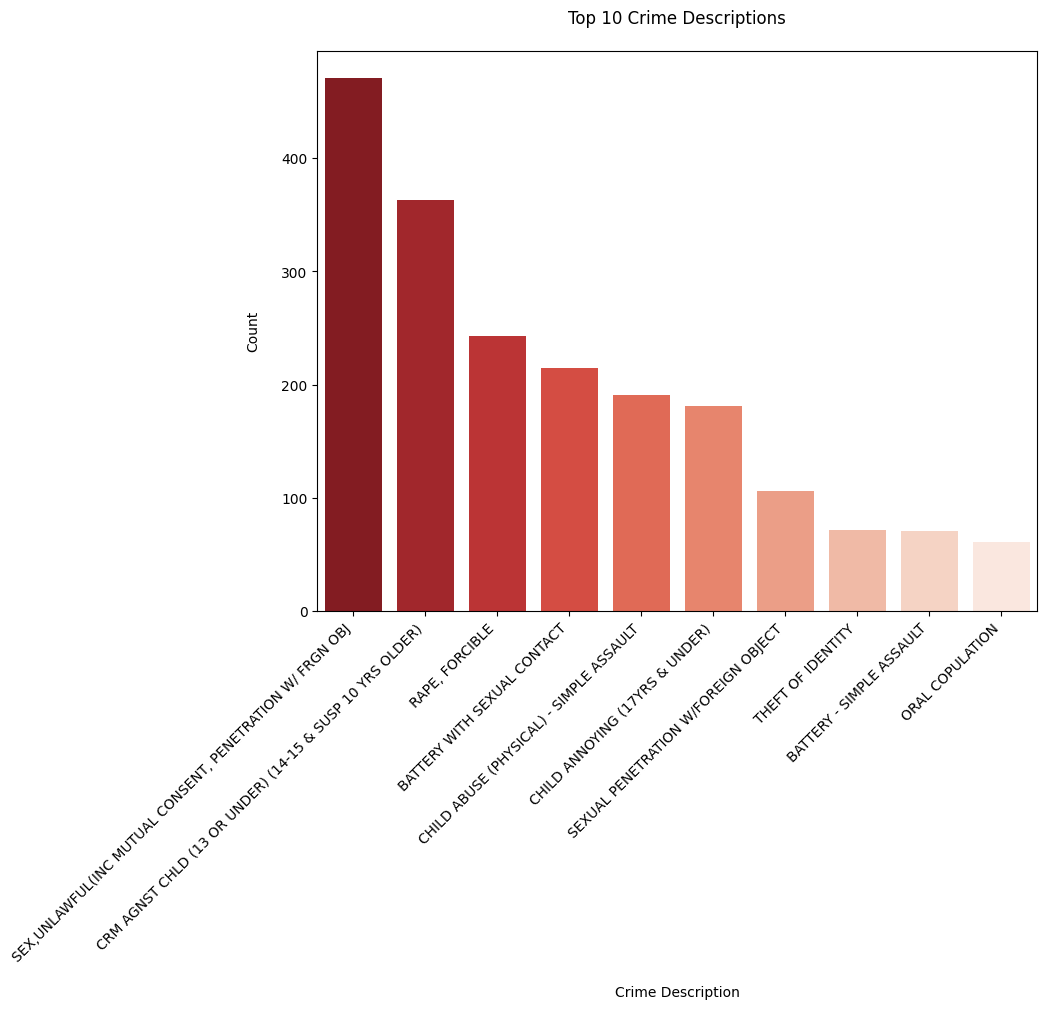

In [10]:
teenger_df = df[(df['day_dift'] > 35) & (df['age_description'] == 'teenager')]
crime_amount = teenger_df['crime_description'].value_counts().reset_index()
crime_amount.columns = ['crime_description', 'count']


top_10_crime_amount = crime_amount.head(10)


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=top_10_crime_amount,
    x='crime_description',
    y='count',
    palette=sns.color_palette("Reds_r", n_colors=len(top_10_crime_amount)) 
)
barplot.set_title('Top 10 Crime Descriptions', pad=20)
barplot.set_xlabel('Crime Description', labelpad=15)
barplot.set_ylabel('Count', labelpad=15)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)


plt.show()


### גנבי זהות בהולנבק

In [7]:
identity_theft = df[df["crime_description"] == "THEFT OF IDENTITY"]
len(identity_theft)
### 53467 
### מקרים של גניבת זהות איפה חיים אתגר בחישוב זריז מעל48 מקרים בממוצע ליום בשלוש שנים זה כבר בעיה 
### נחקוראת העניין 


53467

#### נעיף מבט על התפלגות הגילאים של הקורבנות

C:\Users\Win10\AppData\Local\Temp\ipykernel_2160\1974408678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')


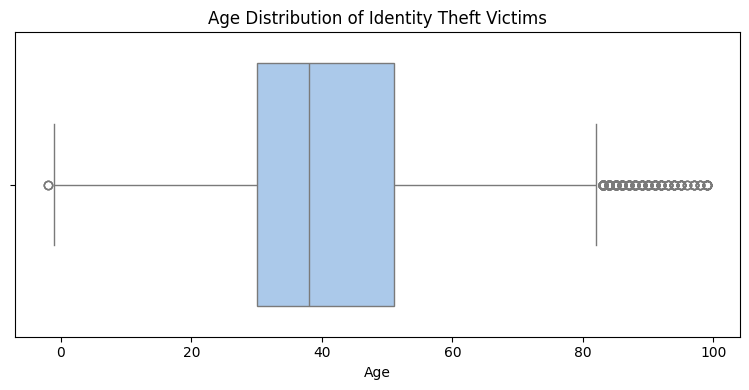

In [15]:
plt.figure(figsize=(15,4))


plt.subplot(1, 2, 1)
sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')
plt.title('Age Distribution of Identity Theft Victims')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [17]:
identity_theft_age0 = identity_theft[identity_theft['victim_age'] <= 0]
len(identity_theft_age0)


992

קיימים כ992 ערכים שהגיל שלהם הוא קטן או שווה ל 0 נבחר להשאיר אותם מכיוון שסביר שהמתלוננים בחרו להישאר בעילום שם או טעות בהקלדת הנתונים נבחר להשאירים כדי הם עדיין מקרים שקרו 

#### נבחן את אזורי הפשיעה הבהם נעשים פשעי גניבת הזהות

In [53]:
idt_by_area = identity_theft['area_name'].value_counts().reset_index()
idt_by_area.columns = ["area_name","amount"]
idt_by_area


,area_name,amount
0,77th Street,3849
1,Southeast,3431
2,Southwest,3323
3,Devonshire,2926
4,West LA,2902
5,Topanga,2826
6,N Hollywood,2820
7,West Valley,2797
8,Van Nuys,2780
9,Mission,2675


#### נבחן את המקומות הבהם נעשים פשעי גניבת הזהות

In [59]:
place_counts = identity_theft['premise_description'].value_counts().reset_index()
place_counts.columns = ['place', 'count']
place_counts.head(10)



,place,count
0,SINGLE FAMILY DWELLING,26250
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",12915
2,BANK,2452
3,AUTOMATED TELLER MACHINE (ATM),2205
4,CYBERSPACE,1592
...,...,...
154,WATER FACILITY,1
155,MORTUARY,1
156,SWAP MEET,1
157,SLIPS/DOCK/MARINA/BOAT,1


#### נבדוק מה הם האיזורים שעושים שימוש במקומות שמתעסקים בכסף כדי לגנוב את זהות הקורבנות

In [63]:
selected_premises = [
    "BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK",
    "DRIVE THRU BANKING (WINDOW)",
    "BANKING INSIDE MARKET-STORE",
    "CHECK CASHING",
    "SAVINGS & LOAN",
    "FINANCE COMPANY",
    "CREDIT UNION",
    "AUTOMATED TELLER MACHINE (ATM)",
    "BANK"
]



idt= identity_theft[identity_theft['premise_description'].isin(selected_premises)]
idt_area_name.columns = ['area_name', 'amount']
idt_area_name


,area_name,amount
0,Hollenbeck,541
1,N Hollywood,496
2,Van Nuys,409
3,Devonshire,334
4,Rampart,332
5,Harbor,316
6,Northeast,299
7,Pacific,251
8,Foothill,233
9,Newton,231


###### נתון מפתיע הולנבק האזור שנמצא במקומות האחרונים (שלישי לפני הסוף) נמצא במקום הראשון שמדובר על פשעים שנעשו במקומות שמתעסקים בכסף

#### ננסה להבין מי האוכלוסייה שסובלת הכי הרבה מגנבי זהות במקומות שעיק התעסוקתם זה כסף בהולנבק

In [68]:
idt_Hollenbeck = identity_theft[(identity_theft['premise_description'].isin(selected_premises)) & (identity_theft['area_name'] == 'Hollenbeck')]


idt_Hollenbeck_by_descent = idt_Hollenbeck['victim_descent'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']
idt_Hollenbeck_by_descent

,victim_descent,amount
0,Hispanic,406
1,Black,48
2,White,40
3,Unknown,17
4,Other,10
5,Chinese,6
6,Filipino,4
7,Asian,3
8,Pacific Islander,2
9,Vietnamese,2


##### ניתן לראות שבפער ניקר ההיספנים המסכנים סובלים הכי הרבה מהגניבות זהות במקמות  שעיקר התעסקותם זה כסף

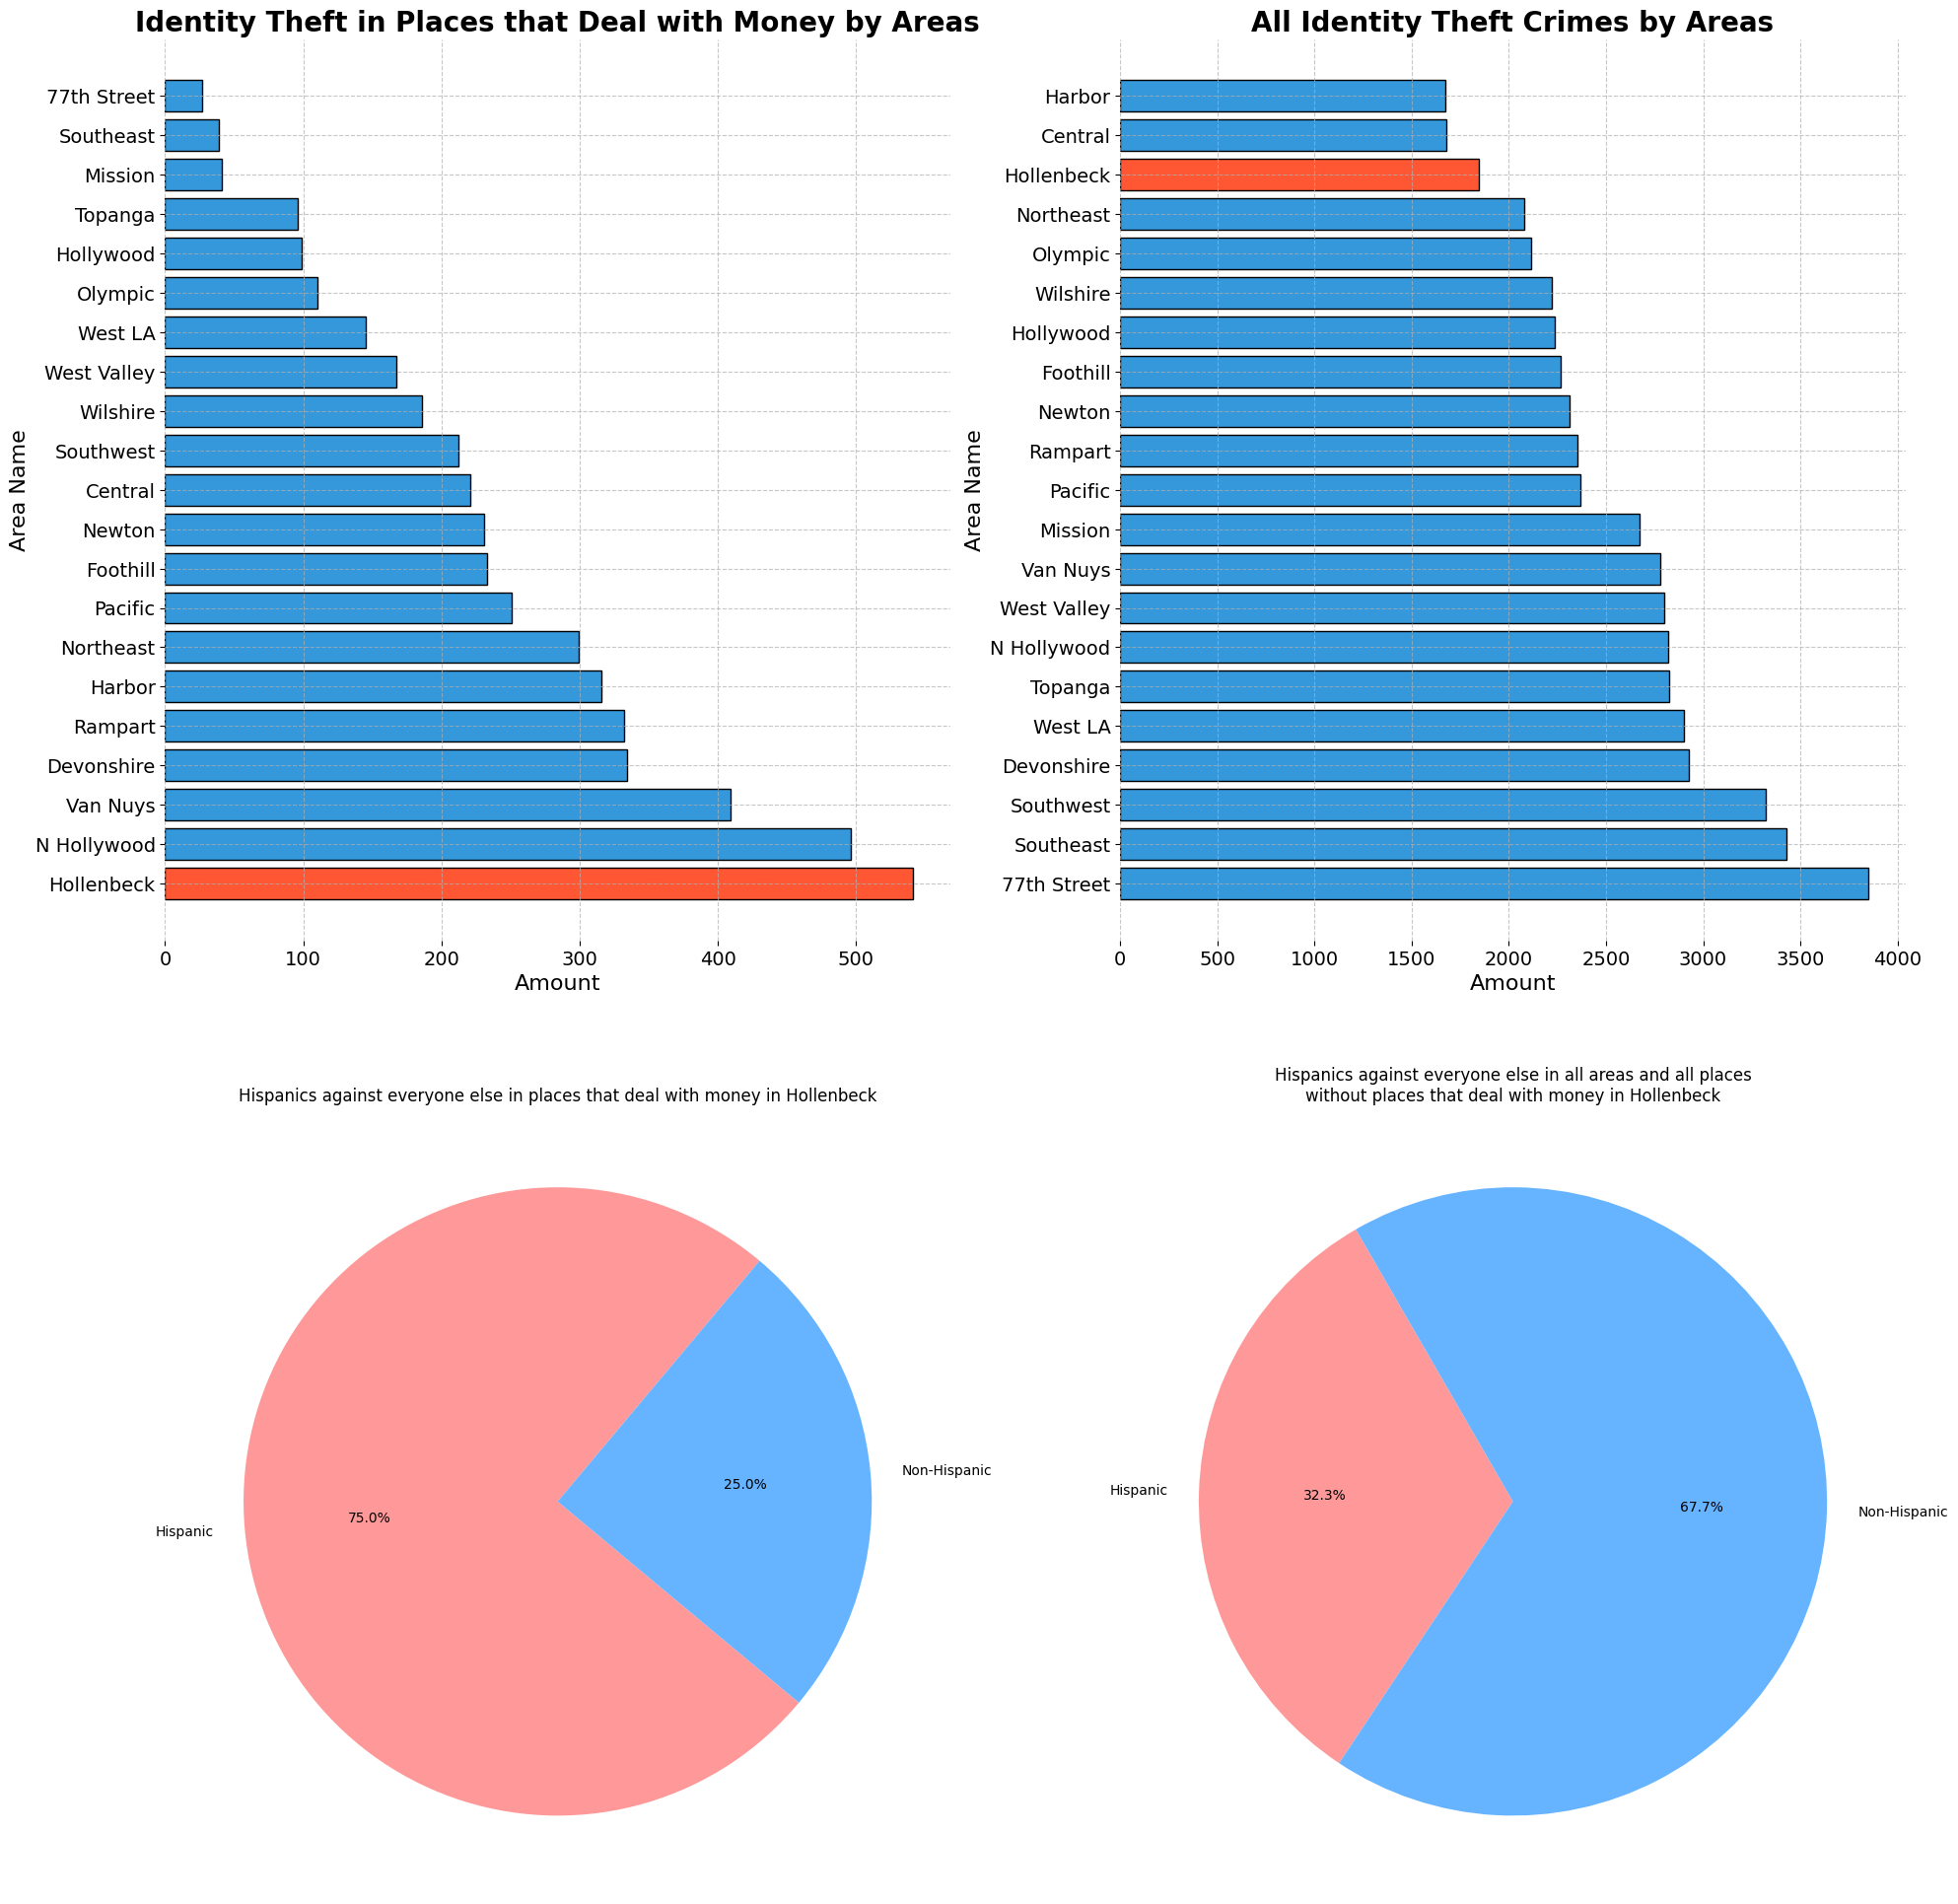

In [83]:

idt_Hollenbeck_by_descent['descent_category'] = idt_Hollenbeck_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')


descent_summary = idt_Hollenbeck_by_descent.groupby('descent_category')['amount'].sum()
descent_summary_percentage = (descent_summary / descent_summary.sum()) * 100


idt_by_victim_descent = identity_theft[~(
    (identity_theft['victim_descent'] == 'Hispanic') & 
    (identity_theft['area_name'] == 'Hollenbeck') & 
    (identity_theft['premise_description'].isin(selected_premises))
)]

idt_by_victim_descent = idt_by_victim_descent['victim_descent'].value_counts().reset_index()
idt_by_victim_descent.columns = ["victim_descent", "amount"]
idt_by_victim_descent['descent_category'] = idt_by_victim_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
idt_by_victim_summary = idt_by_victim_descent.groupby('descent_category')['amount'].sum()
idt_by_victim_summary_percentage = (idt_by_victim_summary / idt_by_victim_summary.sum()) * 100


fig, axs = plt.subplots(2, 2, figsize=(20, 20))


axs[0, 0].barh(idt_area_name['area_name'], idt_area_name['amount'], color=set_colors(idt_area_name), edgecolor='black')
axs[0, 0].set_title('Identity Theft in Places that Deal with Money by Areas', fontsize=20, weight='bold')
axs[0, 0].set_xlabel('Amount', fontsize=16)
axs[0, 0].set_ylabel('Area Name', fontsize=16)
axs[0, 0].tick_params(axis='x', labelsize=14)
axs[0, 0].tick_params(axis='y', labelsize=14)


axs[0, 1].barh(idt_by_area['area_name'], idt_by_area['amount'], color=set_colors(idt_by_area), edgecolor='black')
axs[0, 1].set_title('All Identity Theft Crimes by Areas', fontsize=20, weight='bold')
axs[0, 1].set_xlabel('Amount', fontsize=16)
axs[0, 1].set_ylabel('Area Name', fontsize=16)
axs[0, 1].tick_params(axis='x', labelsize=14)
axs[0, 1].tick_params(axis='y', labelsize=14)


axs[1, 0].pie(descent_summary_percentage, labels=descent_summary_percentage.index, autopct='%1.1f%%', startangle=50, colors=['#ff9999','#66b3ff'])
axs[1, 0].set_title('Hispanics against everyone else in places that deal with money in Hollenbeck')


axs[1, 1].pie(idt_by_victim_summary_percentage, labels=idt_by_victim_summary_percentage.index, autopct='%1.1f%%', startangle=120, colors=['#ff9999','#66b3ff'])
axs[1, 1].set_title('Hispanics against everyone else in all areas and all places\nwithout places that deal with money in Hollenbeck')

for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

#### מסקנה 2

ניתן להבחין כי כאשר מדובר על פשעי גניבות הזהות באופן כללי האיזור הולנבק נמצא בין האיזורים שבהם כמות פשעי גניבות הזהות מהנמוכים ביותר
אך כאשר אנו מסתכלים על פשעי גניבות הזהות שנעשים במקומות ציבוריים שעיקר התעסקותם זה כסף (בנקים,כספומטים,חברות,אשראי וכו), הולנבק במקום הראשון
מבדיקה קצרה בגוגל, גילנו שבהולנבק שיעור העוני מהגבוהים בארצות הברית, כ33 אחוז נמאים מתחת לקו העוני וגם שההיספנים מהווים כ65 אחוז מכלל העניים בארצות הברית.
נתונים אלו יכולים להסביר את המגמת גניבות הזהות שאנו רואים במקומות ציבוריים שעיקר עיסוקיים זה כסף בהולנבק ,ההנחה שלנו היא שההיספנים שנמצאים שם מהווים "טרף קל"
לגנבי זהות עכב העובדה שרובם עניים קל יותר לפתה אותם למסור פרטיים אישים במקומות כמו בנקים כספומטים וגרומים אחרים שמתעסקים בכסף 

### פשעים בהמשכים

##### בפרק זה נתעסק בקורבנות שדיווחו על פשעים יותר מפעם אחת וננסה לדגום קשרים מסויימים בין עבירות שדווחו על ידי אותו קורבן

In [13]:
new_df = df[df[["crime_code","crime_code_2"]].notna().all(axis=1)]
new_df 

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,crime_code_4,location,cross_street,latitude,longitude,day_time,age_description,period_occurred,day_dift,day_of_week
3,191501505,2020-01-01,2020-01-01,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,Afternoon,old,Winter,0,Wednesday
5,200100501,2020-01-02,2020-01-01,1,Central,163,1,121,"RAPE, FORCIBLE",0413 1822 1262 1415,...,NaN,700 S BROADWAY,NaN,34.0452,-118.2534,Night,adult,Winter,1,Wednesday
6,200100502,2020-01-02,2020-01-02,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,...,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631,Noon,adult,Winter,0,Thursday
7,200100504,2020-01-04,2020-01-04,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,1402 0392,...,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,Night,child,Winter,0,Saturday
8,200100507,2020-01-04,2020-01-04,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,...,NaN,700 BERNARD ST,NaN,34.0677,-118.2398,Night,adult,Winter,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852758,232105737,2023-02-16,2023-02-16,21,Topanga,2156,1,210,ROBBERY,0325 0352 0417 1402 0209 0378 1420 0945 1822,...,NaN,21900 VANOWEN ST,NaN,34.1938,-118.6044,Evening,adult,Winter,0,Thursday
852796,232007881,2023-04-07,2023-04-07,20,Olympic,2039,2,624,BATTERY - SIMPLE ASSAULT,0913 0603 0447 0319 2055 0903 1516,...,NaN,600 S HOOVER ST,NaN,34.0598,-118.2865,Evening,adult,Spring,0,Friday
852824,230616011,2023-10-03,2023-10-03,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0344 1822 1402,...,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157,Morning,adult,Fall,0,Tuesday
852837,230124087,2023-11-14,2023-11-11,1,Central,118,1,121,"RAPE, FORCIBLE",1402 1814 0400 0408 2034 0527,...,NaN,1300 N MAIN ST,NaN,34.0644,-118.2320,Evening,adult,Fall,3,Saturday


In [61]:
import pandas as pd
from itertools import combinations
from collections import Counter

crime_codes_combinations = [
    pair for row in df[['crime_code', 'crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4']].values
    for pair in combinations([code for code in row if not pd.isnull(code) and code != 998.0], 2)
]


filtered_combinations = [pair for pair in crime_codes_combinations if pair[0] != pair[1]]


common_pairs = Counter(filtered_combinations)


crime_descriptions = df[['crime_code', 'crime_description']].drop_duplicates().set_index('crime_code')['crime_description'].to_dict()


common_pairs_df = pd.DataFrame([
    (pair[0], pair[1], crime_descriptions.get(pair[0]), crime_descriptions.get(pair[1]), count)
    for pair, count in common_pairs.items()
], columns=['Crime Code 1', 'Crime Code 2', 'Crime Description 1', 'Crime Description 2', 'Count'])


common_pairs_df = common_pairs_df.sort_values(by='Count', ascending=False)
common_pairs_df

,Crime Code 1,Crime Code 2,Crime Description 1,Crime Description 2,Count
8,761.0,930.0,BRANDISH WEAPON,CRIMINAL THREATS - NO WEAPON DISPLAYED,5855
3,812.0,860.0,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,BATTERY WITH SEXUAL CONTACT,2266
2,121.0,812.0,"RAPE, FORCIBLE",CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,586
99,440.0,626.0,THEFT PLAIN - PETTY ($950 & UNDER),INTIMATE PARTNER - SIMPLE ASSAULT,468
83,230.0,761.0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BRANDISH WEAPON,431
...,...,...,...,...,...
536,815.0,814.0,SEXUAL PENETRATION W/FOREIGN OBJECT,CHILD PORNOGRAPHY,1
868,761.0,622.0,BRANDISH WEAPON,BATTERY ON A FIREFIGHTER,1
869,622.0,761.0,BATTERY ON A FIREFIGHTER,BRANDISH WEAPON,1
531,761.0,820.0,BRANDISH WEAPON,ORAL COPULATION,1


### בדיקת תיקים פתוחים 

In [218]:
invest_cont_df = df[df['status_description'] == 'Invest Cont']


descent_invest_cont_counts = invest_cont_df.groupby('victim_descent').size().reset_index(name='count')


total_descent_counts = df['victim_descent'].value_counts().reset_index()
total_descent_counts.columns = ['victim_descent', 'total_count']


merged_counts = pd.merge(descent_invest_cont_counts, total_descent_counts, on='victim_descent')


merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total_count']) * 100


merged_counts = merged_counts.sort_values(by='percentage', ascending=False).reset_index(drop=True)
merged_counts

,victim_descent,count,total_count,percentage
0,Laotian,56,56,100.000000
1,Chinese,3270,3313,98.702083
2,Vietnamese,876,893,98.096305
3,Japanese,1154,1181,97.713802
4,Cambodian,64,66,96.969697
5,Asian Indian,413,426,96.948357
6,Filipino,3445,3580,96.229050
7,American Indian/Alaskan Native,765,805,95.031056
8,Pacific Islander,216,229,94.323144
9,Samoan,43,46,93.478261


### סחר בבנות נוער

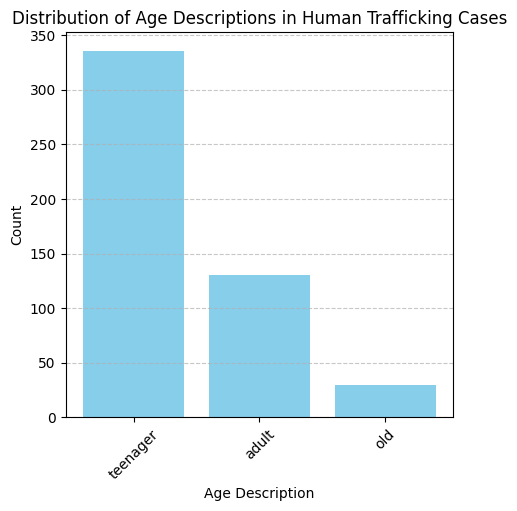

,age_description,count
0,teenager,336
1,adult,130
2,old,30


In [119]:
human_trafficking_df = df[df['crime_description'].str.contains('HUMAN TRAFFICKING', case=False, na=False)]
human_trafficking_df 
age_description_counts = human_trafficking_df['age_description'].value_counts().reset_index()
age_description_counts.columns = ['age_description', 'count']
plt.figure(figsize=(5,5))
plt.bar(age_description_counts['age_description'], age_description_counts['count'], color='skyblue')
plt.title('Distribution of Age Descriptions in Human Trafficking Cases')
plt.xlabel('Age Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
age_description_counts



סהכ יש כ496 מקרים של סחר בבני אדם בארצות הברית בין השנים 2020 ל  2023 מתוכם כ336 הם בני נוער

In [134]:
teenager_trafficking_df= human_trafficking_df[human_trafficking_df['age_description'] == 'teenager']



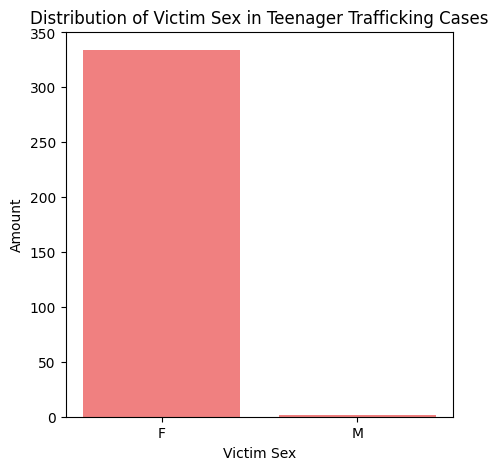

In [133]:
teenager_sex = teenager_trafficking_df['victim_sex'].value_counts().reset_index()
teenager_sex.columns = ["victim_sex", "amount"]


plt.figure(figsize=(5, 5))
plt.bar(teenager_sex['victim_sex'], teenager_sex['amount'], color='lightcoral')  
plt.xlabel('Victim Sex')
plt.ylabel('Amount')
plt.title('Distribution of Victim Sex in Teenager Trafficking Cases')
plt.show()

באופן חד משמעי כאשרמ מדובר על סחר בבני נוער למעט שתי מקרים בודדים הפשעים נעשים נגד נשים מגמה גועלית שחייב לעצור

In [136]:
F_teenager_trafficking_df = human_trafficking_df[(human_trafficking_df['age_description'] == 'teenager') & (human_trafficking_df['victim_sex'] == 'F')]
F_teenager_trafficking_df


,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,cross_street,latitude,longitude,day_time,age_description,period_occurred,day_dift,day_of_week,month,year
3853,221205377,2021-02-24,2020-03-01,12,77th Street,1239,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,0908 0443,...,FIGUEROA BL,33.9863,-118.2881,Afternoon,teenager,Spring,360,6,3,2020
11009,200608037,2020-03-17,2020-03-10,6,Hollywood,678,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,1415 0943 1259,...,INSTITUTE,34.0855,-118.3091,Night,teenager,Spring,7,1,3,2020
13898,200716658,2020-11-20,2020-02-01,7,Wilshire,724,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,0908 0913 1820 0500,...,NaN,34.0747,-118.3563,Night,teenager,Winter,293,5,2,2020
14645,200505333,2020-01-31,2020-01-31,5,Harbor,504,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,0913 1817 1251 1259 0943 1402,...,NaN,33.8561,-118.3035,Morning,teenager,Winter,0,4,1,2020
16032,200604646,2020-01-13,2020-01-12,6,Hollywood,678,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,1251 1259 0943 1402,...,INSTITUTE,34.0854,-118.3091,Evening,teenager,Winter,1,6,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841273,231219004,2023-09-03,2023-07-12,12,77th Street,1249,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,0943 0913 1259 1215,...,FIGUEROA ST,33.9806,-118.2827,Afternoon,teenager,Summer,53,2,7,2023
841842,231204682,2023-01-10,2023-01-06,12,77th Street,1256,2,921,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,0342 1259 2024 0913 0943,...,NaN,33.9727,-118.2827,Evening,teenager,Winter,4,4,1,2023
842987,231819700,2023-11-21,2023-11-21,18,Southeast,1841,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,1259 1822 0943,...,FIGUEROA,33.9399,-118.2826,Morning,teenager,Fall,0,1,11,2023
843697,231210708,2023-04-21,2023-04-21,12,77th Street,1256,2,822,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,1259 1215 0908 1402 0943,...,NaN,33.9717,-118.2827,Morning,teenager,Spring,0,4,4,2023


### פריצות לנכנסים של האוכלוסייה המבוגרת 

In [8]:
old_df = df[df["age_description"]== "old"]

old_df_crime_description = old_df['crime_description'].value_counts().reset_index()
old_df_crime_description.columns = ['crime_description', 'count']

old_df_crime_description.head(20)


,crime_description,count
0,BATTERY - SIMPLE ASSAULT,9901
1,BURGLARY,8426
2,THEFT OF IDENTITY,7226
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5190
4,THEFT PLAIN - PETTY ($950 & UNDER),5010
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,4778
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4681
7,BURGLARY FROM VEHICLE,4323
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",3131
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2983


C:\Users\Win10\AppData\Local\Temp\ipykernel_4540\807225261.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black')


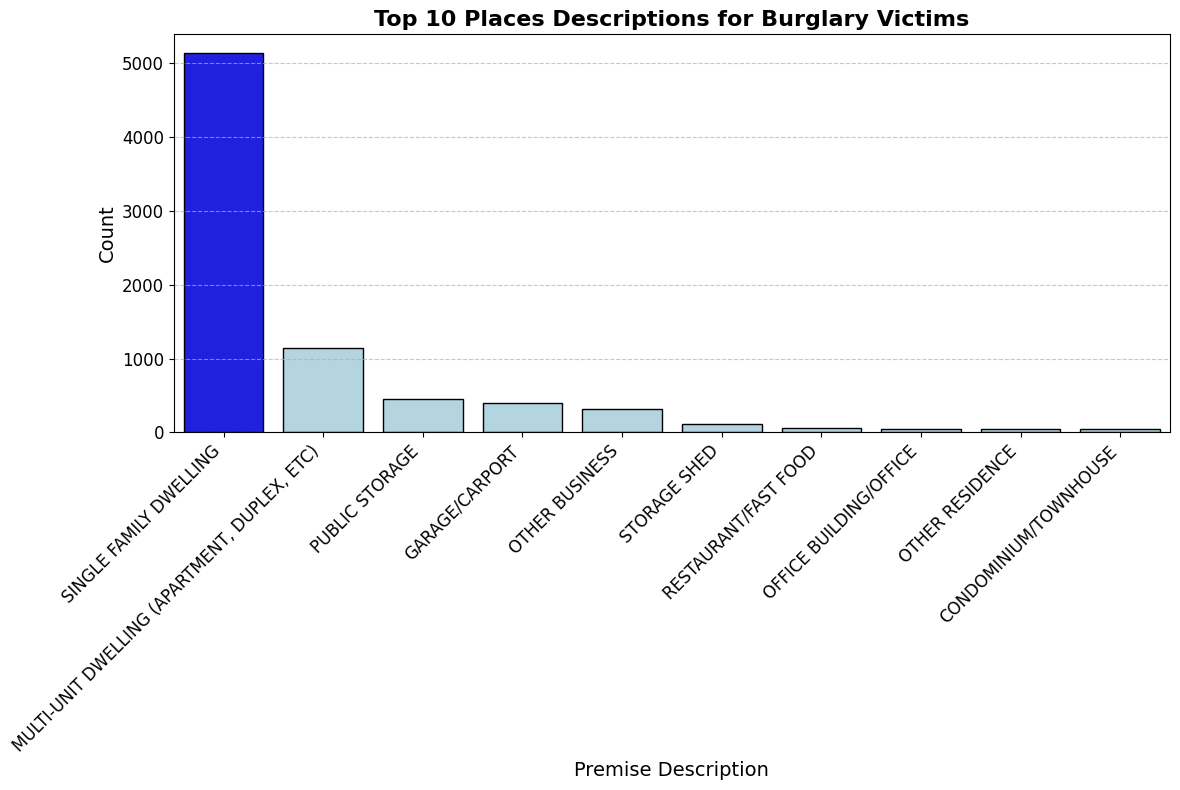

In [9]:
old_burglary_df = old_df[old_df["crime_description"] == "BURGLARY"]


premise_description_counts = old_burglary_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']


top_10_premise_descriptions = premise_description_counts.head(10)

plt.figure(figsize=(12, 8))


colors = ['lightblue' if count != top_10_premise_descriptions['count'].max() else 'blue' for count in top_10_premise_descriptions['count']]


sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black')


plt.xlabel('Premise Description', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Places Descriptions for Burglary Victims', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

על פי הגרף נראה שרוב אכלוסיית הזקנים שנפגעת מפריצות,מדווחת על פריצות לביתהם. אם זאת ניתן לראות שקיימות גם פריצות לעסקים בתדירות נמוכה

#### נבדוק האם המשטרה מצליחה להקטין את הפריצות נגד האוכלוסייה המבוגרת 

In [43]:
old_burglary_df['date_occurred'] = pd.to_datetime(old_burglary_df['date_occurred'])
old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year
yearly_counts_old_burglary_df = old_burglary_df['year_occurred'].value_counts().reset_index()
yearly_counts_old_burglary_df.columns = ['year', 'amount_burglaries']
yearly_counts_old_burglary_df


C:\Users\Win10\AppData\Local\Temp\ipykernel_4540\1268011678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_burglary_df['date_occurred'] = pd.to_datetime(old_burglary_df['date_occurred'])
C:\Users\Win10\AppData\Local\Temp\ipykernel_4540\1268011678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year


,year,amount_burglaries
0,2023,2393
1,2022,2271
2,2021,1899
3,2020,1863


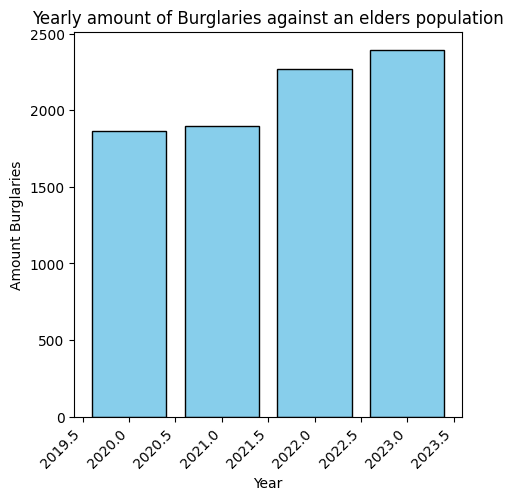

In [11]:
yearly_counts_old_burglary_df['year'] = yearly_counts_old_burglary_df['year']

plt.figure(figsize=(5,5))
bars = plt.bar(yearly_counts_old_burglary_df['year'], yearly_counts_old_burglary_df['amount burglaries'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Amount Burglaries')
plt.title('Yearly amount of Burglaries against an elders population')
plt.xticks(rotation=45, ha='right')
plt.show()

על פי הגרף ניתן להבחין במגמת עלייה מדאיגה בנושא פריצות נגד האוכלוסייה המבוגרת

#### ננסה להבין כמה פושעים שביצעו פריצות לנכנסים של אנשים מהאוכלוסייה המבוגרת נענשים

In [12]:
status_description_counts = old_burglary_df['status_description'].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']
status_description_counts

,status_description,count
0,Invest Cont,7716
1,Adult Arrest,521
2,Adult Other,185
3,Juv Arrest,4


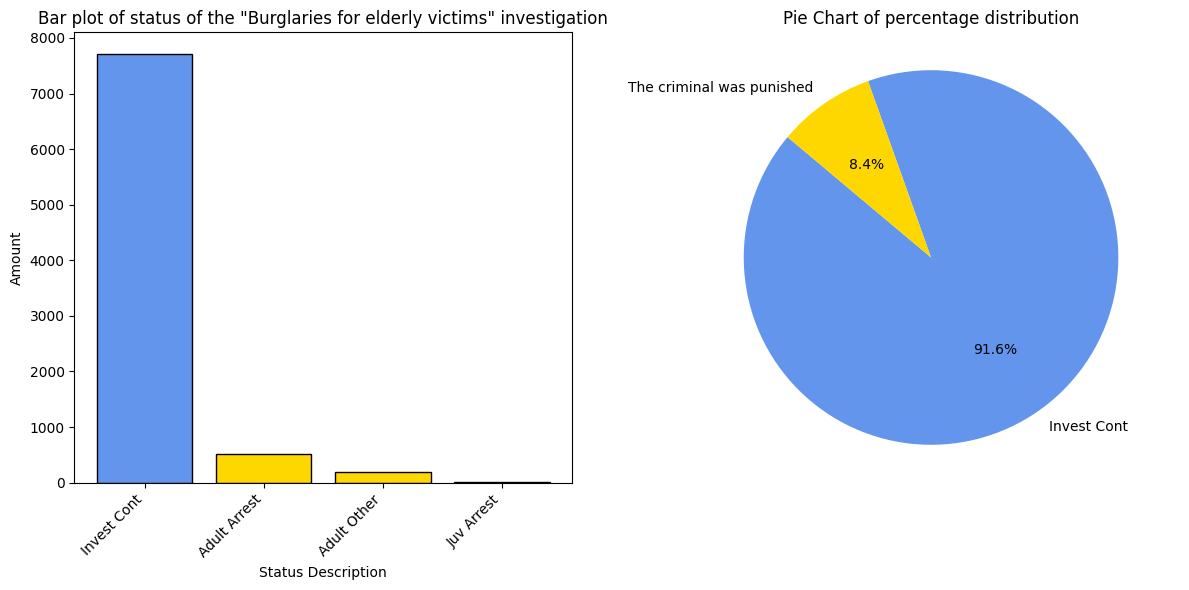

In [13]:
invest_cont_count = status_description_counts[status_description_counts['status_description'] == "Invest Cont"]['count'].sum()
other_count = status_description_counts['count'].sum() - invest_cont_count

status_description_simplified = pd.DataFrame({
    'status_description': ['Invest Cont', 'The criminal was punished'],
    'count': [invest_cont_count, other_count]
})


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
colors = ["#6495ED", "#FFD700"]
plt.pie(status_description_simplified['count'], labels=status_description_simplified['status_description'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Pie Chart of percentage distribution')
plt.axis('equal')


plt.subplot(1, 2, 1)
colors = ['#6495ED' if count == status_description_counts['count'].max() else '#FFD700' for count in status_description_counts['count']]
plt.bar(status_description_counts['status_description'], status_description_counts['count'], color=colors, edgecolor='black')
plt.xlabel('Status Description')
plt.ylabel('Amount')
plt.title('Bar plot of status of the "Burglaries for elderly victims" investigation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

ניתן לראות על פי הגרפים שב91.6 אחוז מהמקרים בהם האוכלוסייה הזקנה מדווחת על פריצה, החקירה נמצאת במצב פתוח, משמע רוב הפורצים לא נעצרים. מבחינה כמותית מתוך 8426 מקרים בהם פרצו לבתים ועסקים של אנשים מעל גיל 60 כ7716 מקרים עדיין מוגדרים כמקרים פתוחים

### נבדוק האם יש מגמת עלייה או ירידה ביחס הפושעים שנענשו במהלך השנים

In [14]:
status_description_yearly_counts = old_burglary_df.groupby(['year_occurred', 'status_description']).size().reset_index(name='count')


pivot_table = status_description_yearly_counts.pivot(index='year_occurred', columns='status_description', values='count').fillna(0)


pivot_table

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest
year_occurred,,,,
2020,147.0,69.0,1646.0,1.0
2021,146.0,38.0,1715.0,0.0
2022,132.0,45.0,2092.0,2.0
2023,96.0,33.0,2263.0,1.0


In [58]:
required_columns = ['Adult Arrest', 'Adult Other', 'Juv Arrest']
for col in required_columns:
    if col not in pivot_table.columns:
        pivot_table[col] = 0


result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)

result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']
result_df

,Year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [60]:
result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)
result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']
result_df

,Year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


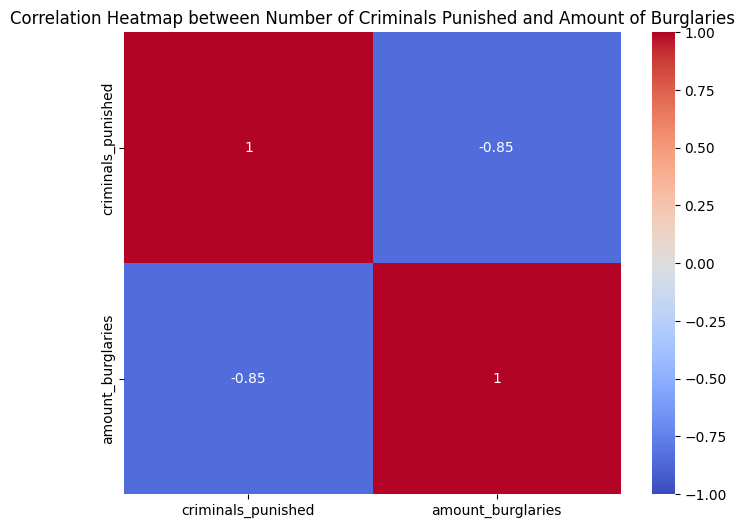

,criminals_punished,amount_burglaries
criminals_punished,1.00000,-0.85139
amount_burglaries,-0.85139,1.00000


In [54]:
correlation_data = final_df[['criminals_punished', 'amount_burglaries']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Number of Criminals Punished and Amount of Burglaries')
plt.show()


correlation_matrix




בהתאם לנתוני הקורלציה, ניתן להסיק כי קיימת מגמה לפיה ככל שמספר העבריינים שנענשים הולך ודועך, כך מספר הפריצות הולך ועולה. קשר זה, שמוערך ב-0.85-, מצביע על קשר שלילי חזק בין שני המקרים

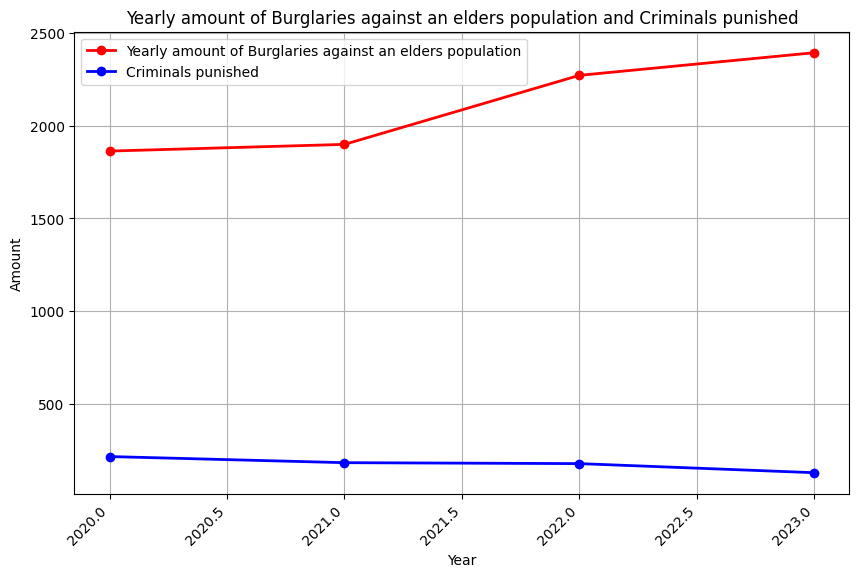

In [64]:
plt.figure(figsize=(10, 6))


plt.plot(final_df["Year"], final_df['amount_burglaries'], color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Yearly amount of Burglaries against an elders population')


plt.plot(result_df["Year"], result_df['criminals_punished'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Criminals punished')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Yearly amount of Burglaries against an elders population and Criminals punished')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.show()


#### מסקנה 3 

על פי החקירה שחברי הצוות עשו בנושא "פריצות לנכסים של האוכלוסייה המבוגרת" לראות כי בשנים האחרונות חלה עלייה בכמות עבירות הפריצה שנעשות נגד אנשים בני 60 ומעלה,
ומנגד חלה ירידה בכמות הפושעים שנענשו על העבירה. הנתונים הללו שמרבית הפורצים לא נענשים מצבעים על מגמת ירידה של המשטרה בלוס אנג'לס בנושא הזה, מה שנותן לפורצים לגטימציה  להמשיך ולבצע פריצות לנכנסים של האוכלוסייה המבוגרת. המשטרה בלוס אנג'לס חייבת לשים יותר דגש על לכידת פורצים שפורצים לנכנסים של אוכלוסיית האנשים מגיל 60 ומעלה
מכייון שעל פי הקורלציה השלילית החזקה שיש בין המקרים, ככל שכמות  העונשים לפורצים שפרצו לנכנסים של אנשים מגיל 60 ומעלה תגדל, כך תגדל גם כמות הפריצות נגד אותה אוכלוסייה תקטן , ולכן חובת המשטרה היא לעצור את כמה שיותר פורצים כאלו על מנת לתת הרתעה לפורצים, ולתת תחושת ביטחון לאוכלוסייה המבוגרת

### קוד כדי לדעת באיזה נושאים יש עלייה משנה לשנה

In [ ]:
old_df['date_occurred'] = pd.to_datetime(old_df['date_occurred'])

# Extract the year from the date_occurred column
old_df['year_occurred'] = old_df['date_occurred'].dt.year

# Count the occurrences for each crime description by year
crime_year_counts = old_df.groupby(['crime_description', 'year_occurred']).size().unstack(fill_value=0)

# Filter the crime descriptions that have an increasing count each year
increasing_crimes = crime_year_counts[
    (crime_year_counts[2020] < crime_year_counts[2021]) & 
    (crime_year_counts[2021] < crime_year_counts[2022]) & 
    (crime_year_counts[2022] < crime_year_counts[2023])
].index.tolist()

# Display the increasing crimes
increasing_crimes